In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import matplotlib.pyplot as plt
import random
import numpy as geek
from collections import Counter as ct
from scipy.stats import norm 

In [0]:
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from math import sqrt
from math import pi
from math import exp

In [113]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [114]:
data1 = pd.read_csv('gdrive/My Drive/F.csv')
data2 = pd.read_csv('gdrive/My Drive/fordkorelasi.csv')
data1.shape
data2.shape

(189, 13)

In [115]:
print(data2)

     HDI Rank                              Country  ... Adj Close      Open
0         168                          Afghanistan  ...  0.282115  2.149165
1          68                              Albania  ...  0.281584  2.153220
2          85                              Algeria  ...  0.281584  2.149165
3          35                              Andorra  ...  0.278396  2.149165
4         147                               Angola  ...  0.276802  2.124835
..        ...                                  ...  ...       ...       ...
184        78   Venezuela (Bolivarian Republic of)  ...  0.287450  2.165385
185       116                             Viet Nam  ...  0.289093  2.128890
186       178                                Yemen  ...  0.286355  2.141055
187       144                               Zambia  ...  0.291283  2.120780
188       156                             Zimbabwe  ...  0.233331  2.444420

[189 rows x 13 columns]


In [116]:
data2['Open'].describe()

count    189.000000
mean       2.244229
std        0.174746
min        2.011294
25%        2.116725
50%        2.157275
75%        2.412742
max        2.611438
Name: Open, dtype: float64

In [117]:
data2['Adj Close'].describe()

count    189.000000
mean       0.297921
std        0.025651
min        0.233331
25%        0.278108
50%        0.286412
75%        0.324682
max        0.349878
Name: Adj Close, dtype: float64

In [118]:
data2['Melek Huruf'].describe()

count    189.000000
mean       0.569608
std        0.194328
min        0.111000
25%        0.400000
50%        0.600000
75%        0.721000
max        0.898000
Name: Melek Huruf, dtype: float64

In [119]:
data2['Pengangguran'].describe()

count    189.000000
mean       0.524878
std        0.186597
min        0.222000
25%        0.299000
50%        0.528000
75%        0.690000
max        0.854000
Name: Pengangguran, dtype: float64

In [120]:
data2['Tukar Rupiah'].describe()

count    189.000000
mean       0.518899
std        0.186069
min        0.232000
25%        0.300000
50%        0.528000
75%        0.661000
max        0.854000
Name: Tukar Rupiah, dtype: float64

In [121]:
data2['Pengeluaran Negara'].describe()

count    189.000000
mean       0.518847
std        0.188255
min        0.232000
25%        0.300000
50%        0.528000
75%        0.669000
max        0.854000
Name: Pengeluaran Negara, dtype: float64

In [122]:
data2['Standar Hidup'].describe()

count    189.000000
mean       0.516259
std        0.187921
min        0.123000
25%        0.300000
50%        0.528000
75%        0.661000
max        0.854000
Name: Standar Hidup, dtype: float64

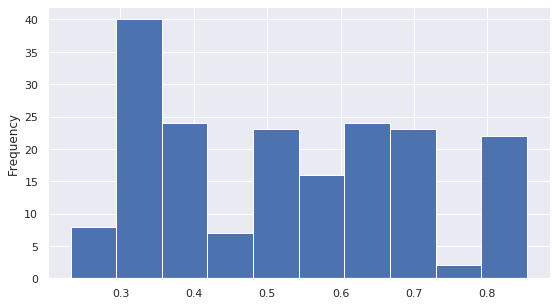

In [123]:
plt.figure(figsize = (9, 5)) 
data2['Tukar Rupiah'].plot(kind ="hist")

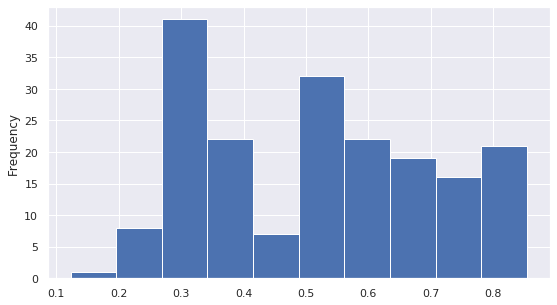

In [124]:
plt.figure(figsize = (9, 5)) 
data2['Standar Hidup'].plot(kind ="hist")

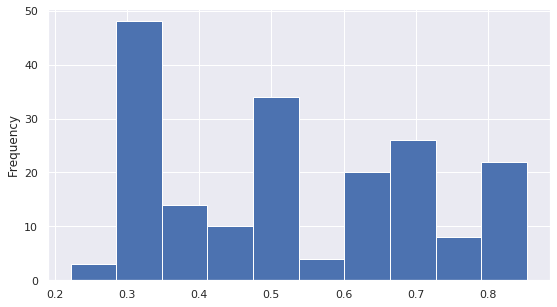

In [125]:
plt.figure(figsize = (9, 5)) 
data2['Pengangguran'].plot(kind ="hist")

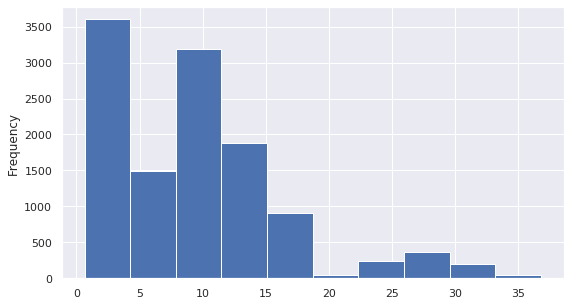

In [126]:
plt.figure(figsize = (9, 5)) 
data1['Open'].plot(kind ="hist")

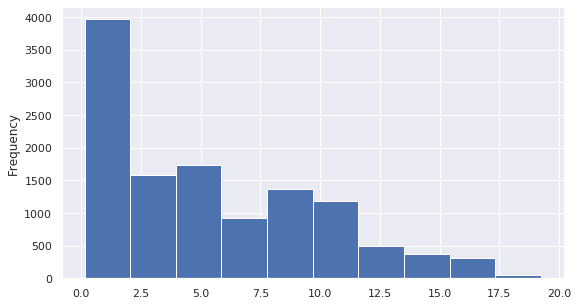

In [127]:
plt.figure(figsize = (9, 5)) 
data1['Adj Close'].plot(kind ="hist")

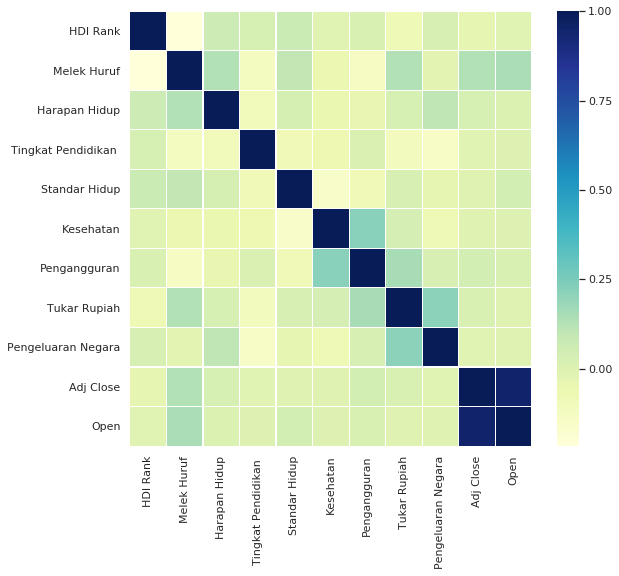

In [128]:
#Korelasi Matrix
corrmat = data2.corr() 
  
f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1) 

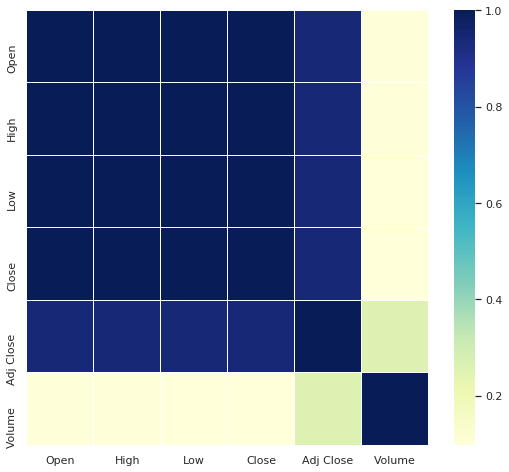

In [129]:
#Korelasi Matrix
corrmat = data1.corr() 
  
f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1)

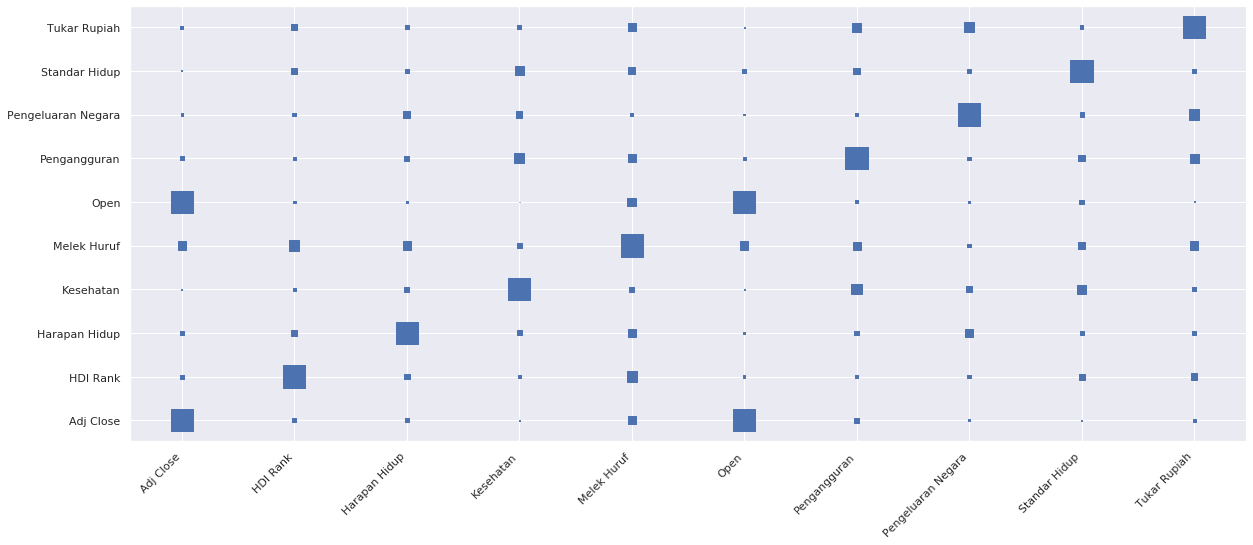

In [130]:
def heatmap(x, y, size):
    fig, ax = plt.subplots()
    
    # Mapping from column names to integer coordinates
    x_labels = [v for v in sorted(x.unique())]
    y_labels = [v for v in sorted(y.unique())]
    x_to_num = {p[1]:p[0] for p in enumerate(x_labels)} 
    y_to_num = {p[1]:p[0] for p in enumerate(y_labels)} 
    
    size_scale = 500
    ax.scatter(
        x=x.map(x_to_num), # Use mapping for x
        y=y.map(y_to_num), # Use mapping for y
        s=size * size_scale, # Vector of square sizes, proportional to size parameter
        marker='s' # Use square as scatterplot marker
    )
    
    # Show column labels on the axes
    ax.set_xticks([x_to_num[v] for v in x_labels])
    ax.set_xticklabels(x_labels, rotation=45, horizontalalignment='right')
    ax.set_yticks([y_to_num[v] for v in y_labels])
    ax.set_yticklabels(y_labels)
    
columns = ['HDI Rank', 'Country', 'Melek Huruf', 'Harapan Hidup', 'Standar Hidup','Kesehatan', 'Pengangguran','Tukar Rupiah','Pengeluaran Negara','Adj Close','Open'] 
corr = data2[columns].corr()
corr = pd.melt(corr.reset_index(), id_vars='index') # Unpivot the dataframe, so we can get pair of arrays for x and y
corr.columns = ['x', 'y', 'value']
heatmap(
    x=corr['x'],
    y=corr['y'],
    size=corr['value'].abs()
)

In [131]:
data2['Tahun IPM'] = pd.to_datetime(data2['Tahun IPM'])
print(data2)

     HDI Rank                              Country  ... Adj Close      Open
0         168                          Afghanistan  ...  0.282115  2.149165
1          68                              Albania  ...  0.281584  2.153220
2          85                              Algeria  ...  0.281584  2.149165
3          35                              Andorra  ...  0.278396  2.149165
4         147                               Angola  ...  0.276802  2.124835
..        ...                                  ...  ...       ...       ...
184        78   Venezuela (Bolivarian Republic of)  ...  0.287450  2.165385
185       116                             Viet Nam  ...  0.289093  2.128890
186       178                                Yemen  ...  0.286355  2.141055
187       144                               Zambia  ...  0.291283  2.120780
188       156                             Zimbabwe  ...  0.233331  2.444420

[189 rows x 13 columns]


In [132]:
data1['Date'] = pd.to_datetime(data1['Date'])
print(data1)

            Date      Open      High       Low     Close  Adj Close    Volume
0     1972-06-01  2.149165  2.173495  2.149165  2.153220   0.282115   1089200
1     1972-06-02  2.153220  2.173495  2.141055  2.149165   0.281584   1173500
2     1972-06-05  2.149165  2.169440  2.141055  2.149165   0.281584   5208100
3     1972-06-06  2.149165  2.157275  2.116725  2.124835   0.278396   1421400
4     1972-06-07  2.124835  2.137000  2.112669  2.112669   0.276802    671800
...          ...       ...       ...       ...       ...        ...       ...
11979 2019-11-29  9.040000  9.100000  9.030000  9.060000   9.060000  13096200
11980 2019-12-02  9.080000  9.140000  9.000000  9.010000   9.010000  37232700
11981 2019-12-03  8.950000  8.950000  8.800000  8.890000   8.890000  40653100
11982 2019-12-04  8.950000  9.030000  8.940000  8.950000   8.950000  29982900
11983 2019-12-05  8.970000  9.000000  8.880000  8.930000   8.930000  23822910

[11984 rows x 7 columns]


In [0]:
data2 = data2.set_index('Tahun IPM')

In [0]:
sns.set(rc={'figure.figsize':(20, 8)})

In [0]:
standar_hidup = data2['Standar Hidup']

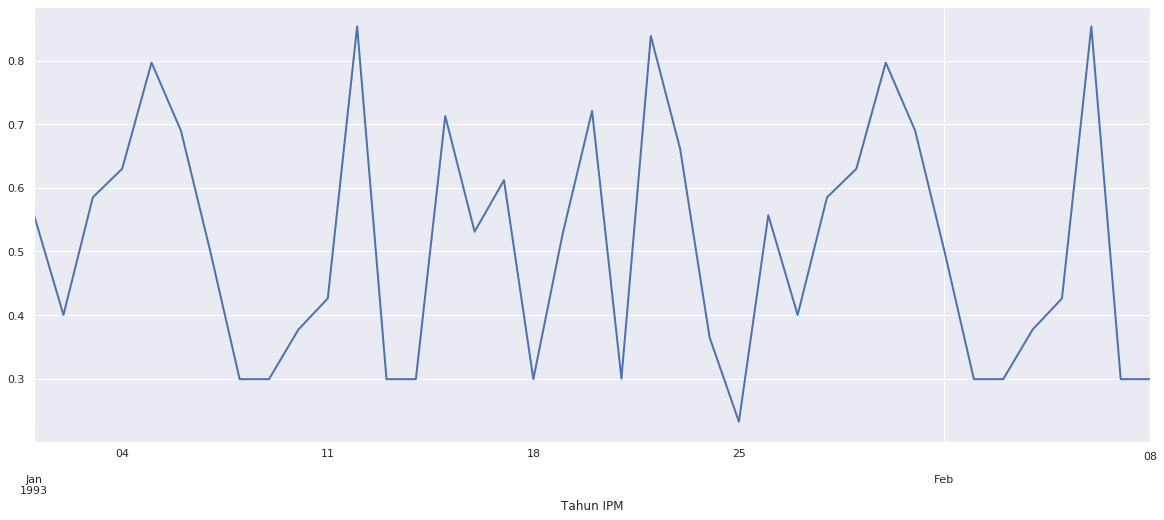

In [136]:
data2.loc['1993', 'Standar Hidup'].plot(linewidth=2);

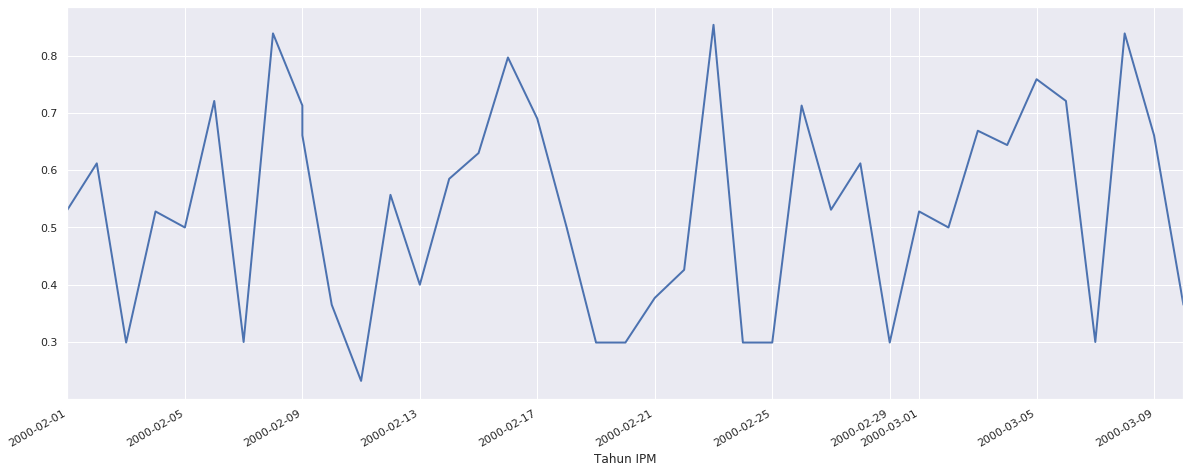

In [137]:
data2.loc['2000', 'Standar Hidup'].plot(linewidth=2);

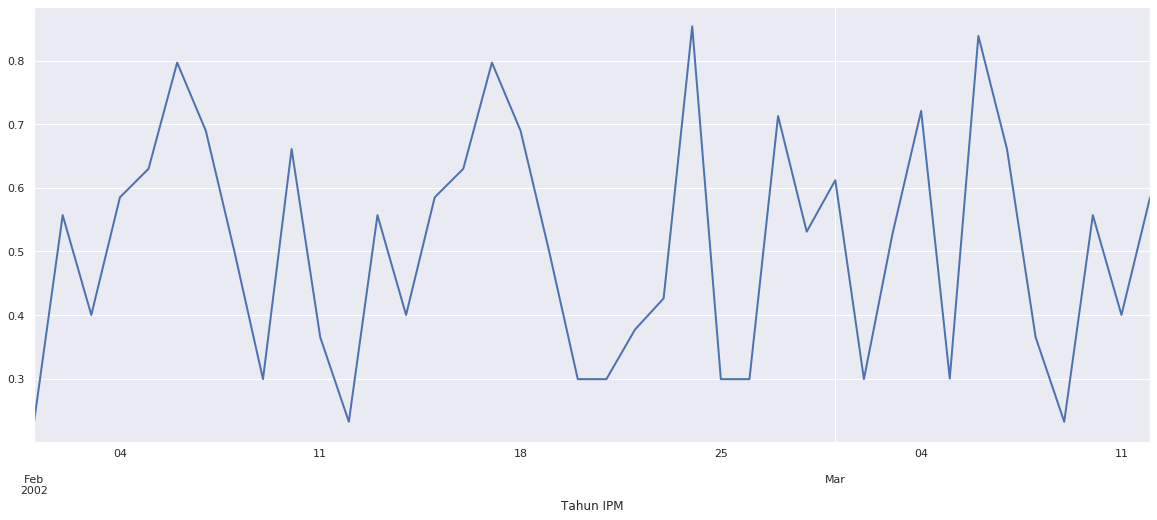

In [138]:
data2.loc['2002', 'Standar Hidup'].plot(linewidth=2);

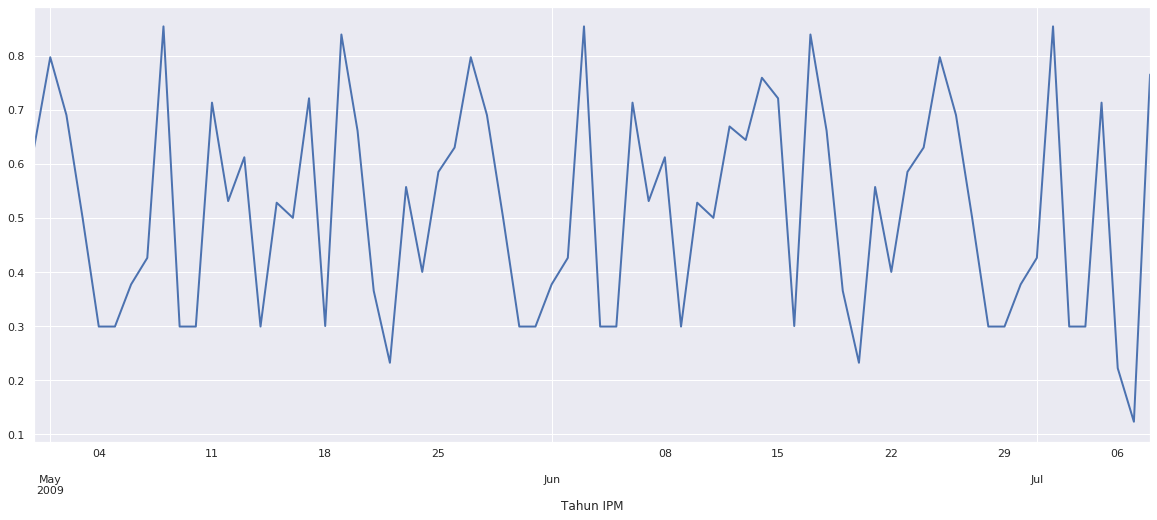

In [139]:
data2.loc['2009', 'Standar Hidup'].plot(linewidth=2);

In [0]:
data1 = data1.set_index('Date')

In [0]:
sns.set(rc={'figure.figsize':(20, 8)})

In [0]:
adj_close = data1['Adj Close']

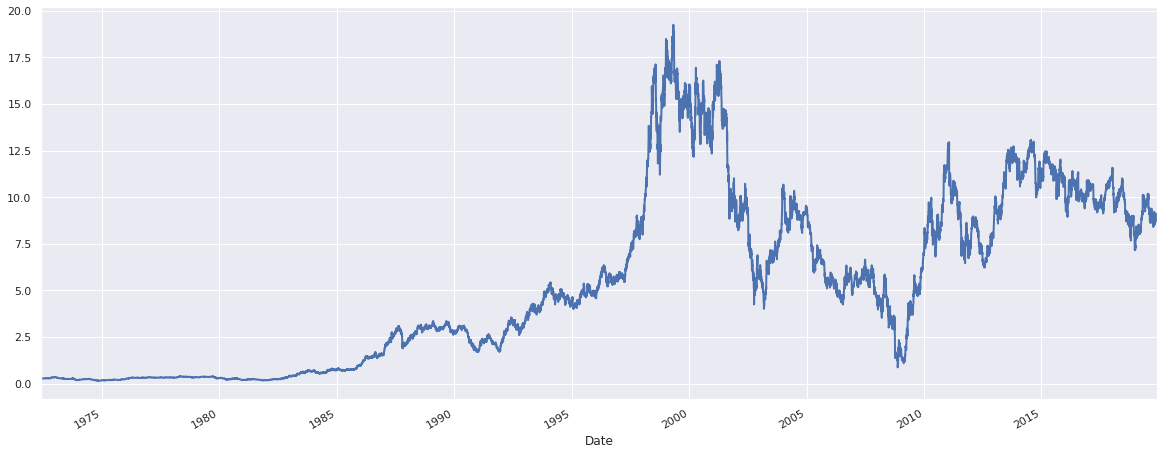

In [143]:
data1.loc['1972': '2019', 'Adj Close'].plot(linewidth=2);

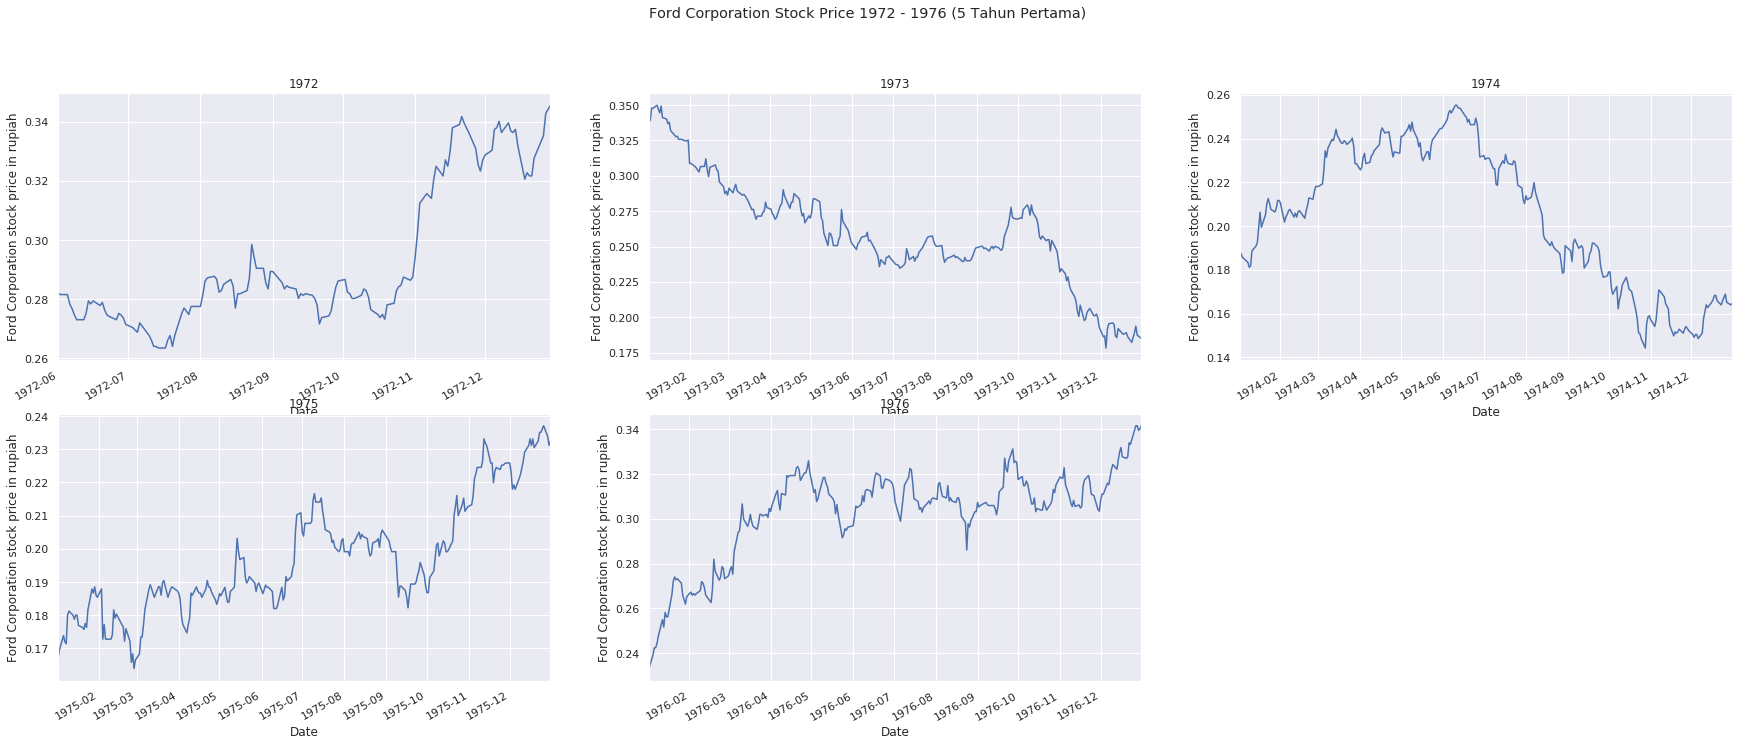

In [144]:
fig = plt.figure(figsize=(30,12))
fig.suptitle ('Ford Corporation Stock Price 1972 - 1976 (5 Tahun Pertama)')

ax1 = fig.add_subplot(231)
ax1.set_title('1972')
ax1 = data1.loc['1972', 'Adj Close'].plot()
ax1.set_ylabel('Ford Corporation stock price in rupiah');

ax2 = fig.add_subplot(232)
ax2.set_title('1973')
ax2 = data1.loc['1973', 'Adj Close'].plot()
ax2.set_ylabel('Ford Corporation stock price in rupiah');

ax3 = fig.add_subplot(233)
ax3.set_title('1974')
ax3 = data1.loc['1974', 'Adj Close'].plot()
ax3.set_ylabel('Ford Corporation stock price in rupiah');

ax4 = fig.add_subplot(234)
ax4.set_title('1975')
ax4 = data1.loc['1975', 'Adj Close'].plot()
ax4.set_ylabel('Ford Corporation stock price in rupiah');

ax5 = fig.add_subplot(235)
ax5.set_title('1976')
ax5 = data1.loc['1976', 'Adj Close'].plot()
ax5.set_ylabel('Ford Corporation stock price in rupiah');

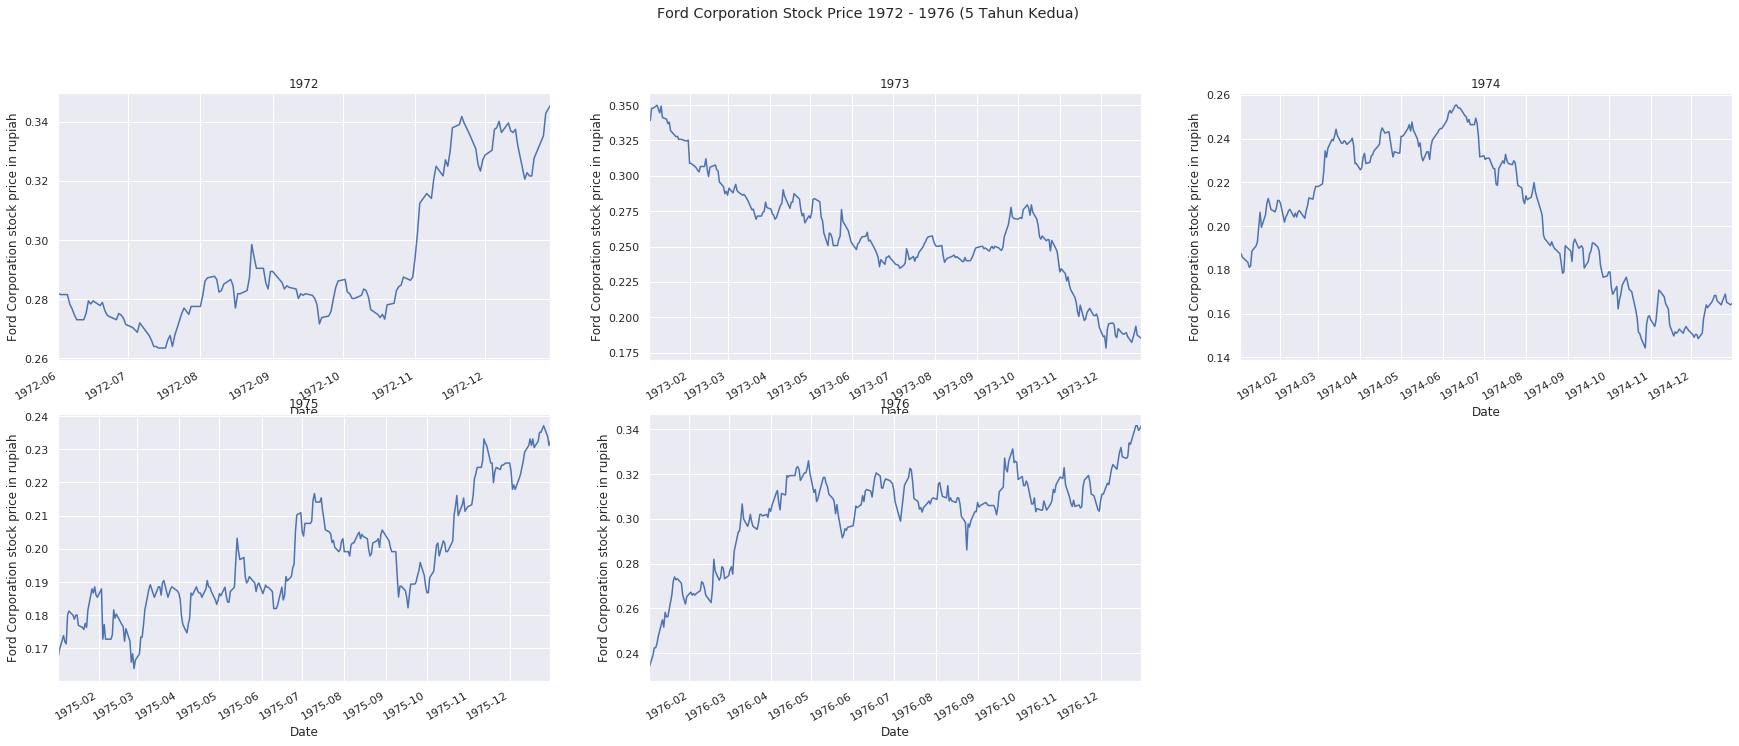

In [145]:
fig = plt.figure(figsize=(30,12))
fig.suptitle ('Ford Corporation Stock Price 1972 - 1976 (5 Tahun Kedua)')

ax1 = fig.add_subplot(231)
ax1.set_title('1972')
ax1 = data1.loc['1972', 'Adj Close'].plot()
ax1.set_ylabel('Ford Corporation stock price in rupiah');

ax2 = fig.add_subplot(232)
ax2.set_title('1973')
ax2 = data1.loc['1973', 'Adj Close'].plot()
ax2.set_ylabel('Ford Corporation stock price in rupiah');

ax3 = fig.add_subplot(233)
ax3.set_title('1974')
ax3 = data1.loc['1974', 'Adj Close'].plot()
ax3.set_ylabel('Ford Corporation stock price in rupiah');

ax4 = fig.add_subplot(234)
ax4.set_title('1975')
ax4 = data1.loc['1975', 'Adj Close'].plot()
ax4.set_ylabel('Ford Corporation stock price in rupiah');

ax5 = fig.add_subplot(235)
ax5.set_title('1976')
ax5 = data1.loc['1976', 'Adj Close'].plot()
ax5.set_ylabel('Ford Corporation stock price in rupiah');

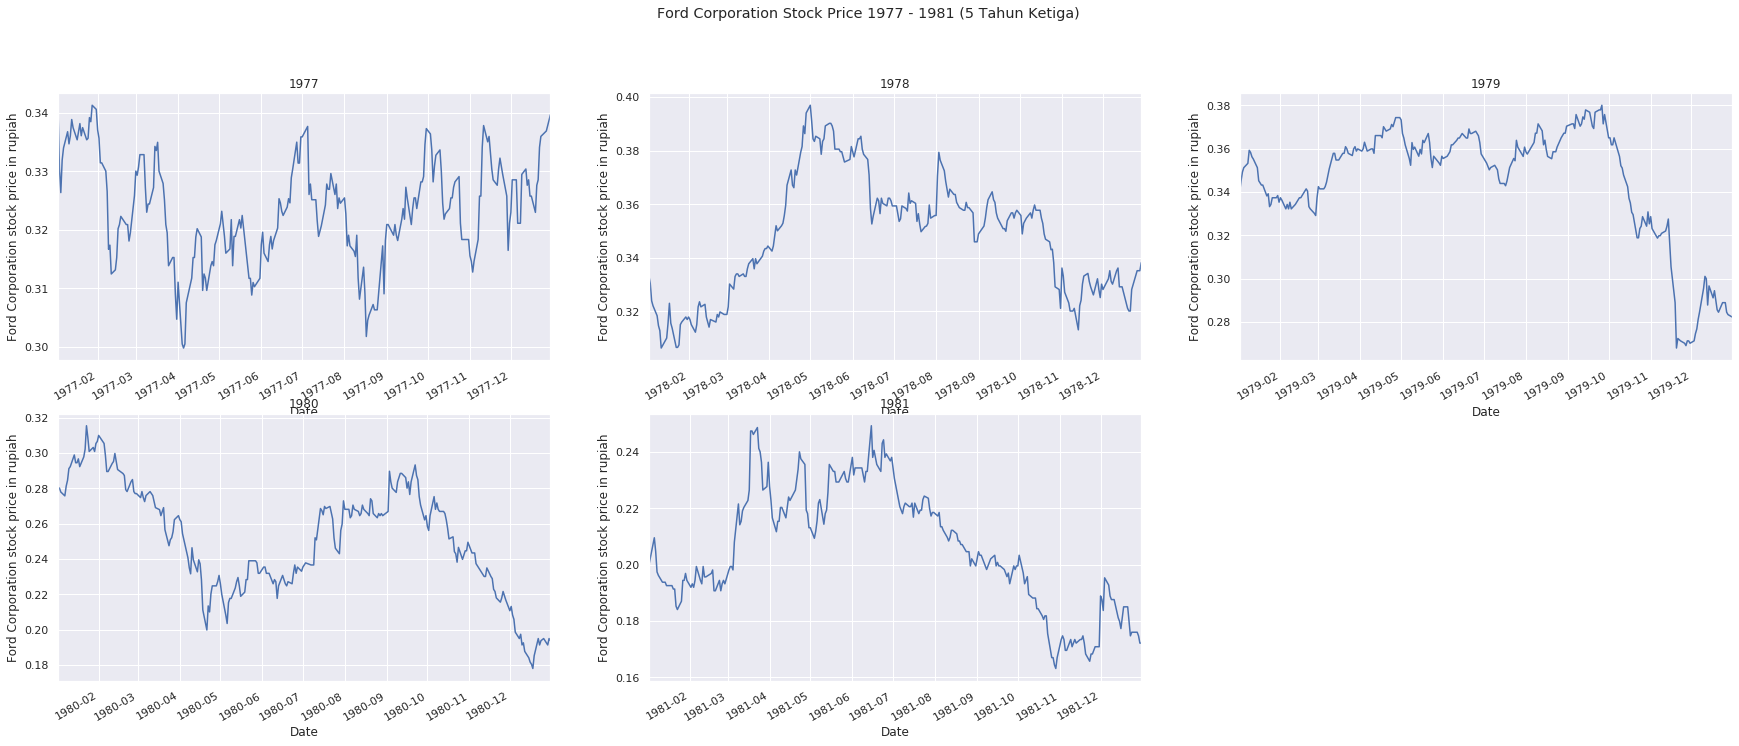

In [146]:
fig = plt.figure(figsize=(30,12))
fig.suptitle ('Ford Corporation Stock Price 1977 - 1981 (5 Tahun Ketiga)')

ax1 = fig.add_subplot(231)
ax1.set_title('1977')
ax1 = data1.loc['1977', 'Adj Close'].plot()
ax1.set_ylabel('Ford Corporation stock price in rupiah');

ax2 = fig.add_subplot(232)
ax2.set_title('1978')
ax2 = data1.loc['1978', 'Adj Close'].plot()
ax2.set_ylabel('Ford Corporation stock price in rupiah');

ax3 = fig.add_subplot(233)
ax3.set_title('1979')
ax3 = data1.loc['1979', 'Adj Close'].plot()
ax3.set_ylabel('Ford Corporation stock price in rupiah');

ax4 = fig.add_subplot(234)
ax4.set_title('1980')
ax4 = data1.loc['1980', 'Adj Close'].plot()
ax4.set_ylabel('Ford Corporation stock price in rupiah');

ax5 = fig.add_subplot(235)
ax5.set_title('1981')
ax5 = data1.loc['1981', 'Adj Close'].plot()
ax5.set_ylabel('Ford Corporation stock price in rupiah');

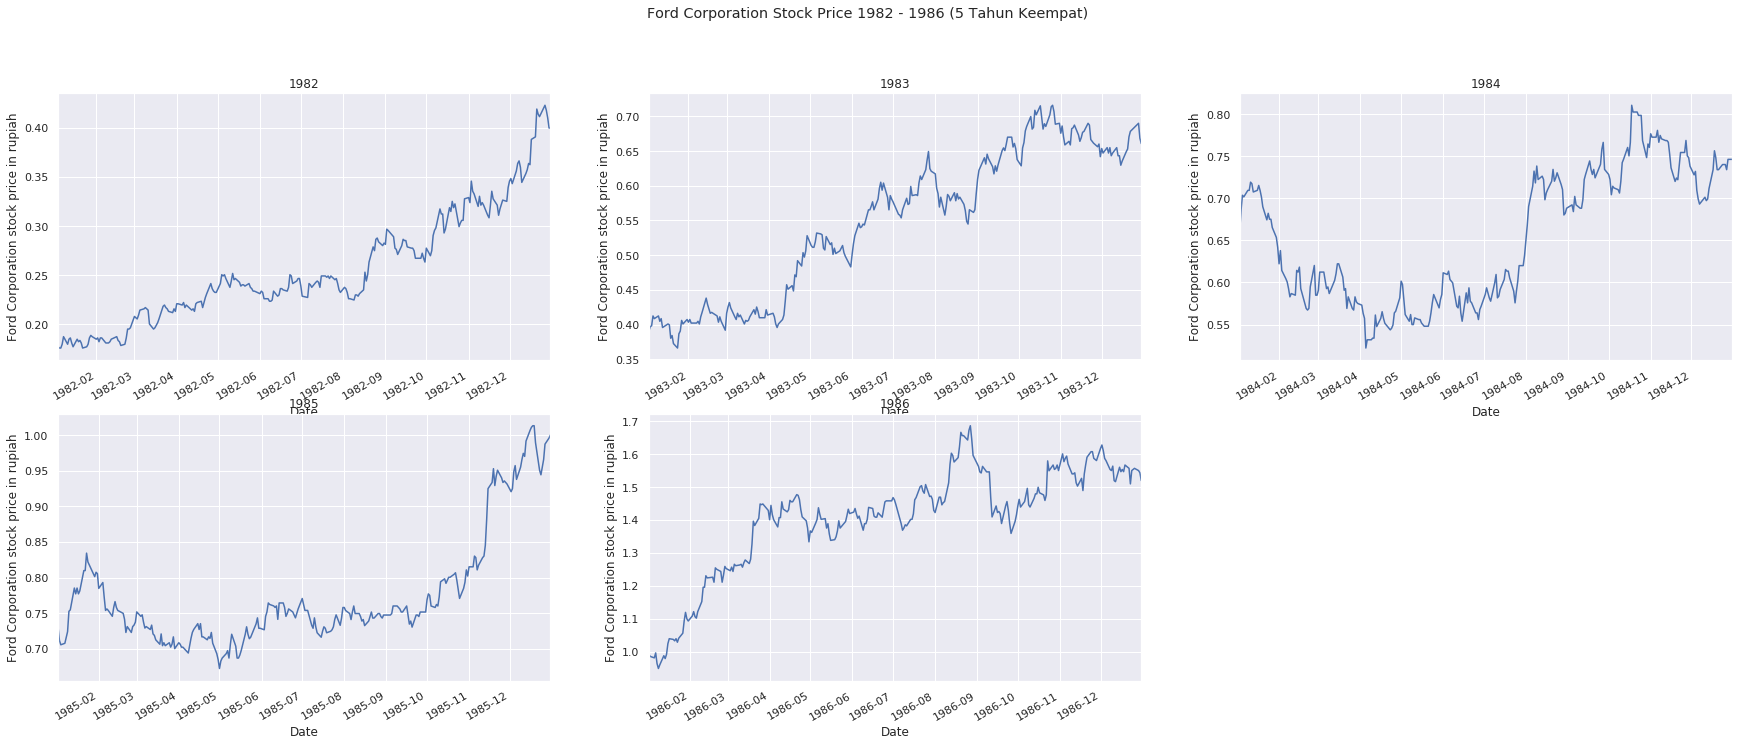

In [147]:
fig = plt.figure(figsize=(30,12))
fig.suptitle ('Ford Corporation Stock Price 1982 - 1986 (5 Tahun Keempat)')

ax1 = fig.add_subplot(231)
ax1.set_title('1982')
ax1 = data1.loc['1982', 'Adj Close'].plot()
ax1.set_ylabel('Ford Corporation stock price in rupiah');

ax2 = fig.add_subplot(232)
ax2.set_title('1983')
ax2 = data1.loc['1983', 'Adj Close'].plot()
ax2.set_ylabel('Ford Corporation stock price in rupiah');

ax3 = fig.add_subplot(233)
ax3.set_title('1984')
ax3 = data1.loc['1984', 'Adj Close'].plot()
ax3.set_ylabel('Ford Corporation stock price in rupiah');

ax4 = fig.add_subplot(234)
ax4.set_title('1985')
ax4 = data1.loc['1985', 'Adj Close'].plot()
ax4.set_ylabel('Ford Corporation stock price in rupiah');

ax5 = fig.add_subplot(235)
ax5.set_title('1986')
ax5 = data1.loc['1986', 'Adj Close'].plot()
ax5.set_ylabel('Ford Corporation stock price in rupiah');

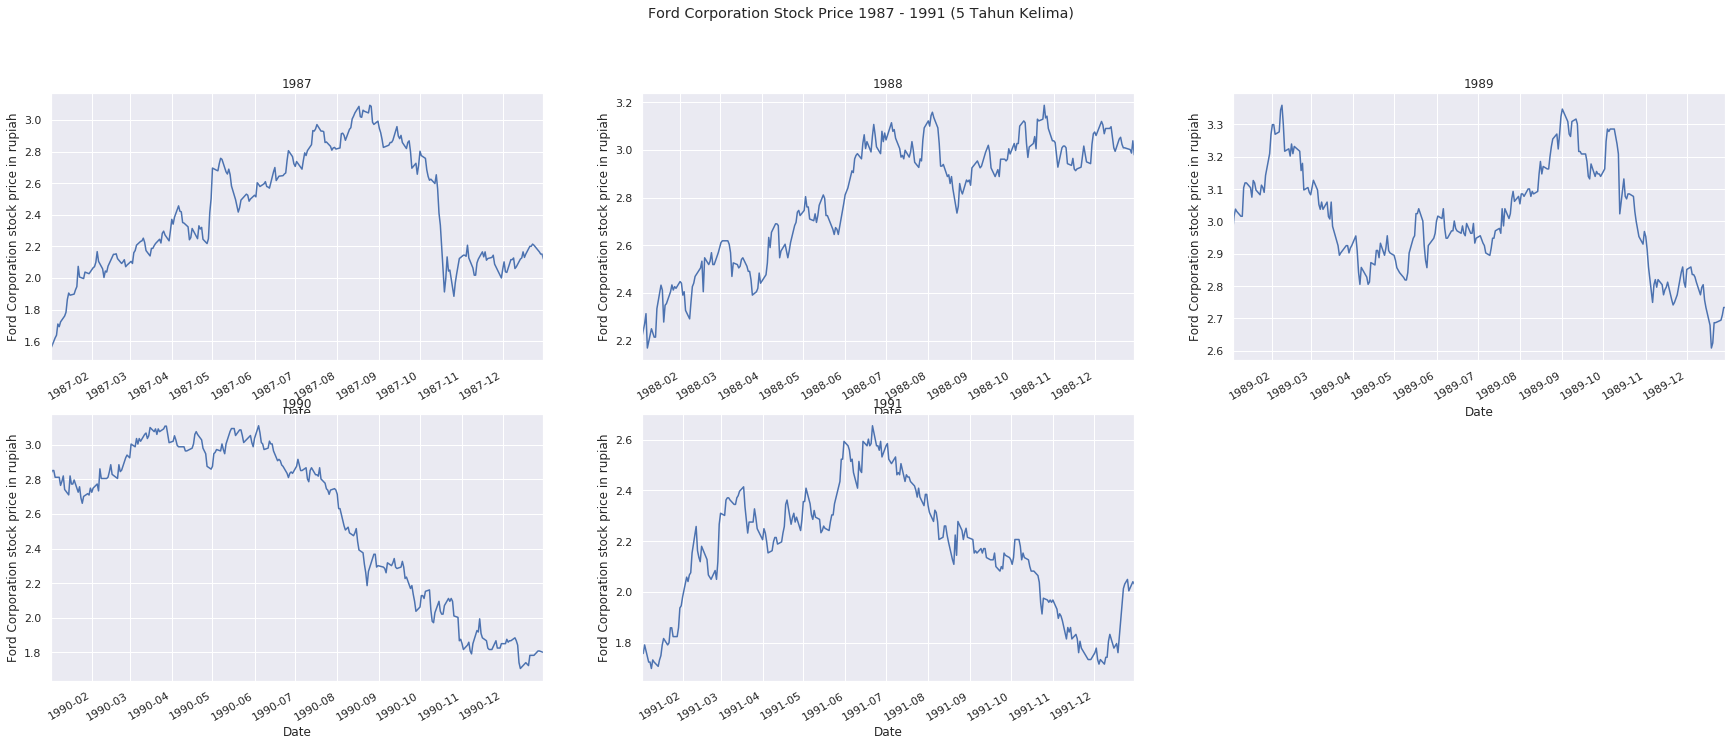

In [148]:
fig = plt.figure(figsize=(30,12))
fig.suptitle ('Ford Corporation Stock Price 1987 - 1991 (5 Tahun Kelima)')

ax1 = fig.add_subplot(231)
ax1.set_title('1987')
ax1 = data1.loc['1987', 'Adj Close'].plot()
ax1.set_ylabel('Ford Corporation stock price in rupiah');

ax2 = fig.add_subplot(232)
ax2.set_title('1988')
ax2 = data1.loc['1988', 'Adj Close'].plot()
ax2.set_ylabel('Ford Corporation stock price in rupiah');

ax3 = fig.add_subplot(233)
ax3.set_title('1989')
ax3 = data1.loc['1989', 'Adj Close'].plot()
ax3.set_ylabel('Ford Corporation stock price in rupiah');

ax4 = fig.add_subplot(234)
ax4.set_title('1990')
ax4 = data1.loc['1990', 'Adj Close'].plot()
ax4.set_ylabel('Ford Corporation stock price in rupiah');

ax5 = fig.add_subplot(235)
ax5.set_title('1991')
ax5 = data1.loc['1991', 'Adj Close'].plot()
ax5.set_ylabel('Ford Corporation stock price in rupiah');

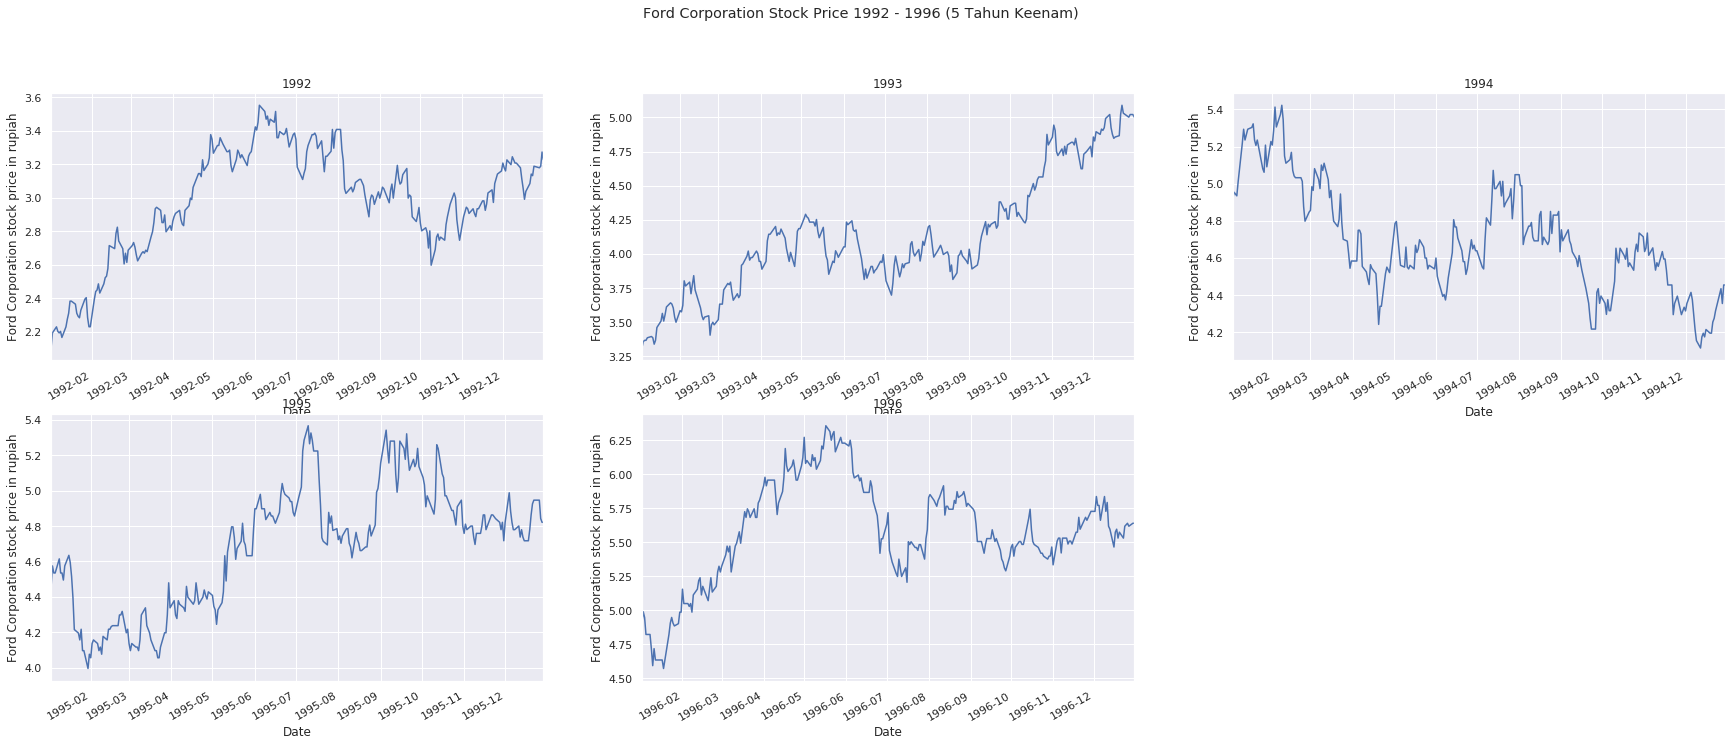

In [149]:
fig = plt.figure(figsize=(30,12))
fig.suptitle ('Ford Corporation Stock Price 1992 - 1996 (5 Tahun Keenam)')

ax1 = fig.add_subplot(231)
ax1.set_title('1992')
ax1 = data1.loc['1992', 'Adj Close'].plot()
ax1.set_ylabel('Ford Corporation stock price in rupiah');

ax2 = fig.add_subplot(232)
ax2.set_title('1993')
ax2 = data1.loc['1993', 'Adj Close'].plot()
ax2.set_ylabel('Ford Corporation stock price in rupiah');

ax3 = fig.add_subplot(233)
ax3.set_title('1994')
ax3 = data1.loc['1994', 'Adj Close'].plot()
ax3.set_ylabel('Ford Corporation stock price in rupiah');

ax4 = fig.add_subplot(234)
ax4.set_title('1995')
ax4 = data1.loc['1995', 'Adj Close'].plot()
ax4.set_ylabel('Ford Corporation stock price in rupiah');

ax5 = fig.add_subplot(235)
ax5.set_title('1996')
ax5 = data1.loc['1996', 'Adj Close'].plot()
ax5.set_ylabel('Ford Corporation stock price in rupiah');

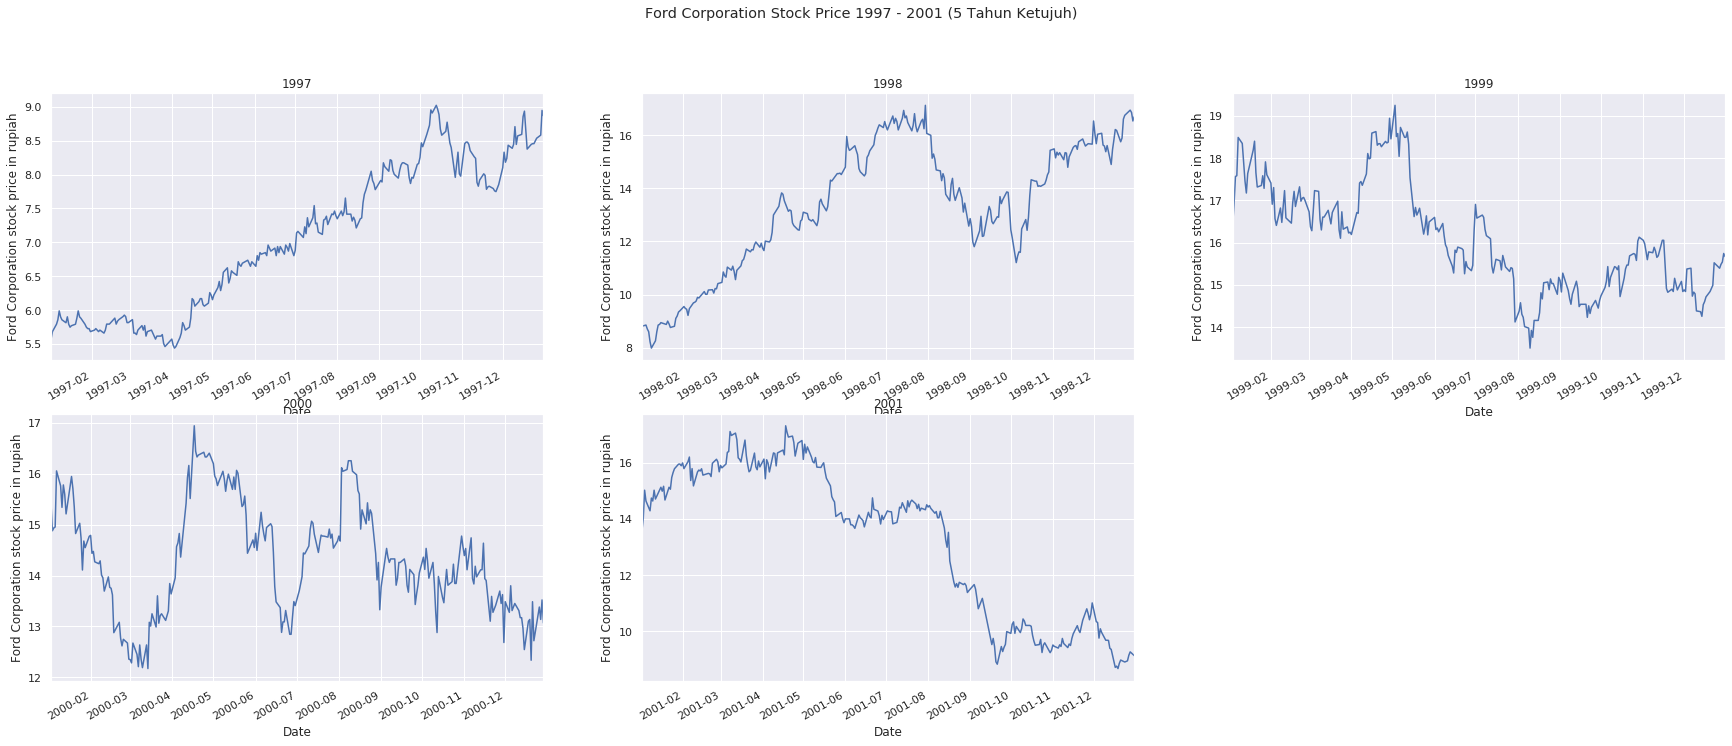

In [150]:
fig = plt.figure(figsize=(30,12))
fig.suptitle ('Ford Corporation Stock Price 1997 - 2001 (5 Tahun Ketujuh)')

ax1 = fig.add_subplot(231)
ax1.set_title('1997')
ax1 = data1.loc['1997', 'Adj Close'].plot()
ax1.set_ylabel('Ford Corporation stock price in rupiah');

ax2 = fig.add_subplot(232)
ax2.set_title('1998')
ax2 = data1.loc['1998', 'Adj Close'].plot()
ax2.set_ylabel('Ford Corporation stock price in rupiah');

ax3 = fig.add_subplot(233)
ax3.set_title('1999')
ax3 = data1.loc['1999', 'Adj Close'].plot()
ax3.set_ylabel('Ford Corporation stock price in rupiah');

ax4 = fig.add_subplot(234)
ax4.set_title('2000')
ax4 = data1.loc['2000', 'Adj Close'].plot()
ax4.set_ylabel('Ford Corporation stock price in rupiah');

ax5 = fig.add_subplot(235)
ax5.set_title('2001')
ax5 = data1.loc['2001', 'Adj Close'].plot()
ax5.set_ylabel('Ford Corporation stock price in rupiah');

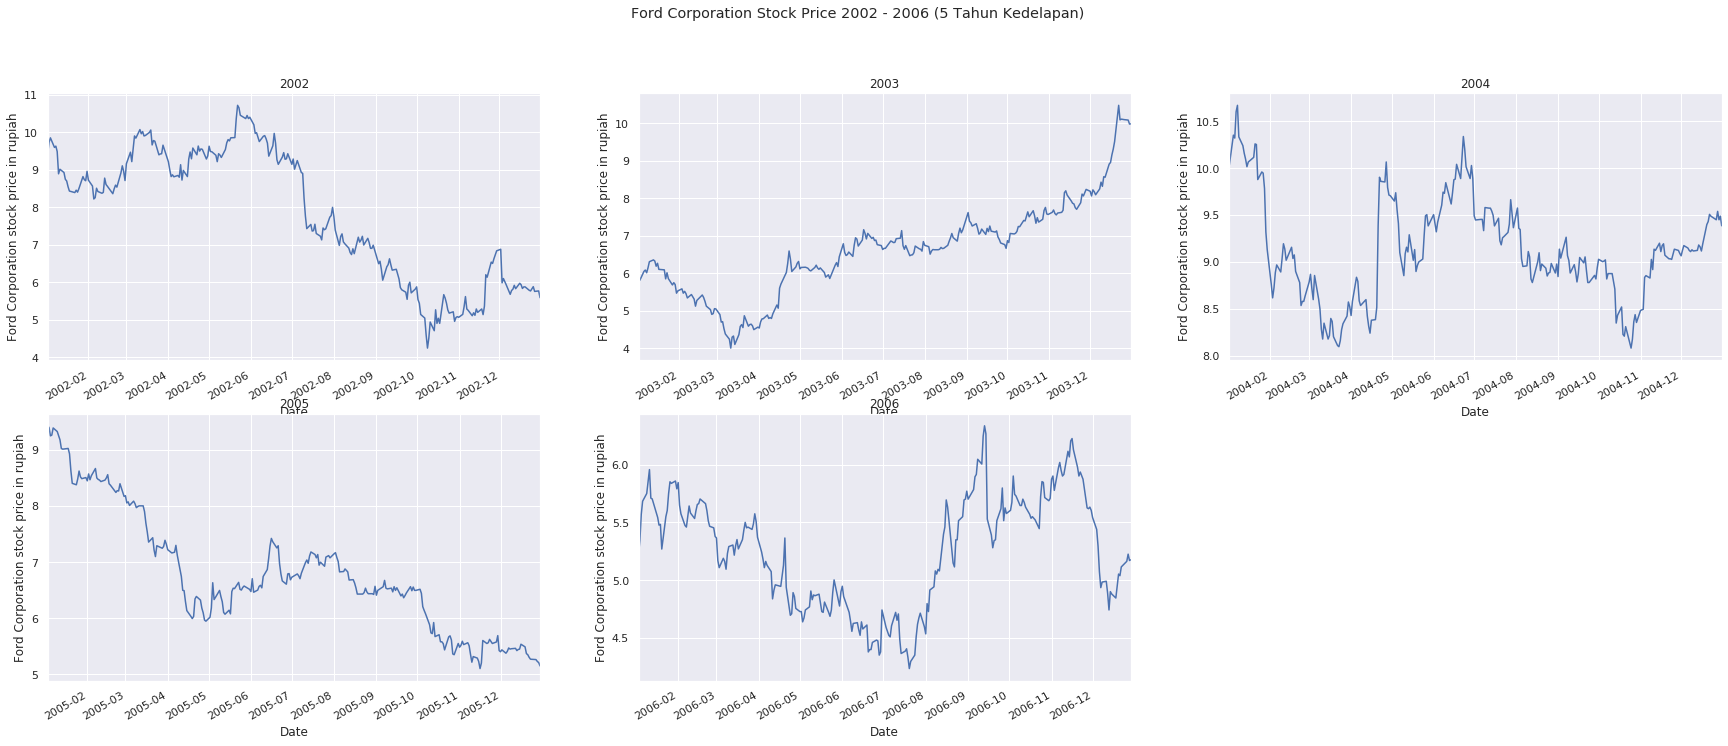

In [151]:
fig = plt.figure(figsize=(30,12))
fig.suptitle ('Ford Corporation Stock Price 2002 - 2006 (5 Tahun Kedelapan)')

ax1 = fig.add_subplot(231)
ax1.set_title('2002')
ax1 = data1.loc['2002', 'Adj Close'].plot()
ax1.set_ylabel('Ford Corporation stock price in rupiah');

ax2 = fig.add_subplot(232)
ax2.set_title('2003')
ax2 = data1.loc['2003', 'Adj Close'].plot()
ax2.set_ylabel('Ford Corporation stock price in rupiah');

ax3 = fig.add_subplot(233)
ax3.set_title('2004')
ax3 = data1.loc['2004', 'Adj Close'].plot()
ax3.set_ylabel('Ford Corporation stock price in rupiah');

ax4 = fig.add_subplot(234)
ax4.set_title('2005')
ax4 = data1.loc['2005', 'Adj Close'].plot()
ax4.set_ylabel('Ford Corporation stock price in rupiah');

ax5 = fig.add_subplot(235)
ax5.set_title('2006')
ax5 = data1.loc['2006', 'Adj Close'].plot()
ax5.set_ylabel('Ford Corporation stock price in rupiah');

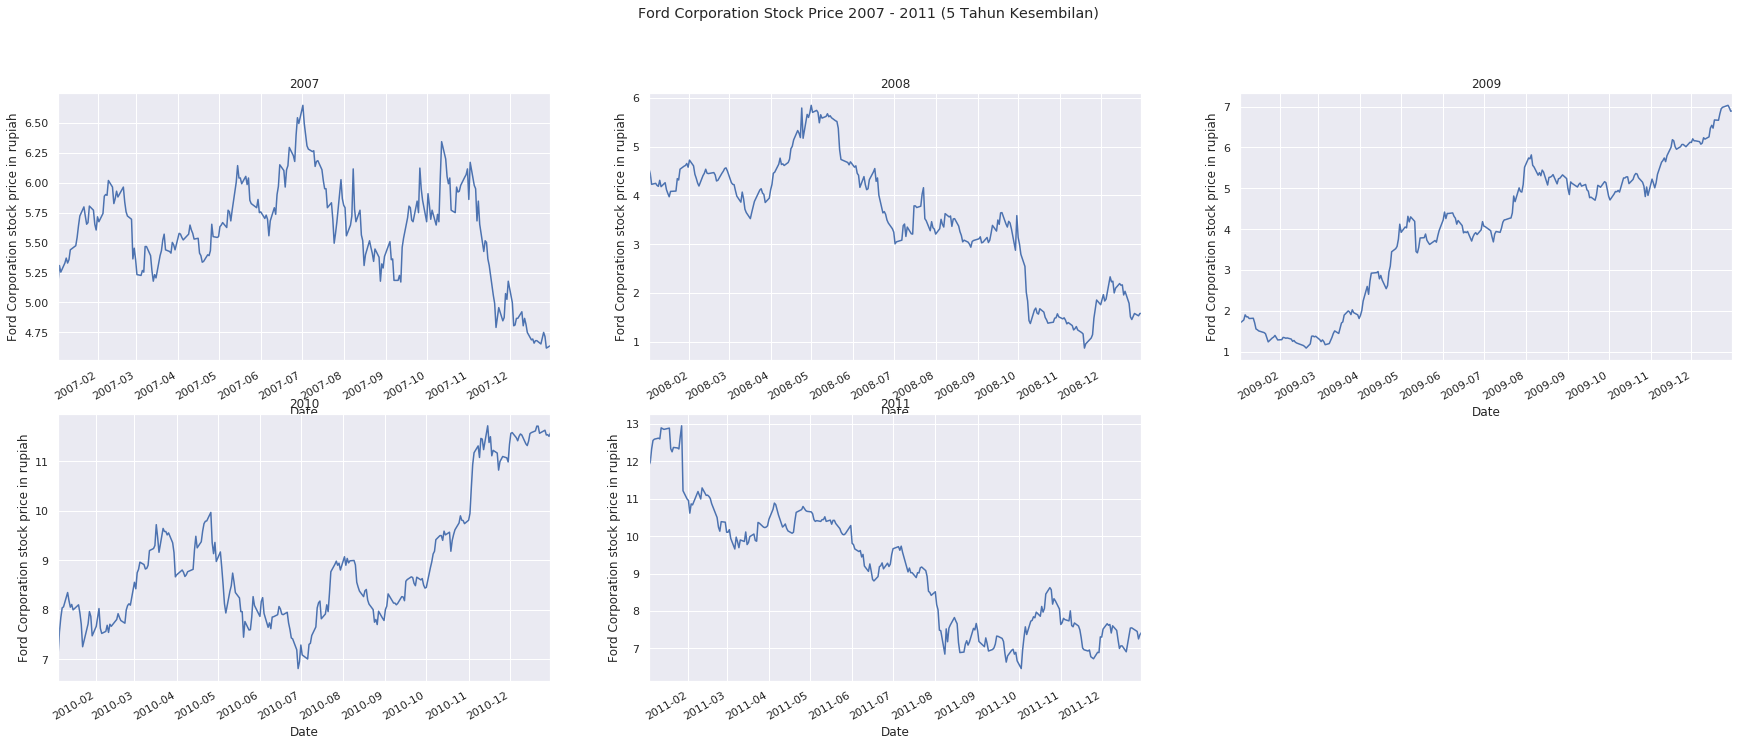

In [152]:
fig = plt.figure(figsize=(30,12))
fig.suptitle ('Ford Corporation Stock Price 2007 - 2011 (5 Tahun Kesembilan)')

ax1 = fig.add_subplot(231)
ax1.set_title('2007')
ax1 = data1.loc['2007', 'Adj Close'].plot()
ax1.set_ylabel('Ford Corporation stock price in rupiah');

ax2 = fig.add_subplot(232)
ax2.set_title('2008')
ax2 = data1.loc['2008', 'Adj Close'].plot()
ax2.set_ylabel('Ford Corporation stock price in rupiah');

ax3 = fig.add_subplot(233)
ax3.set_title('2009')
ax3 = data1.loc['2009', 'Adj Close'].plot()
ax3.set_ylabel('Ford Corporation stock price in rupiah');

ax4 = fig.add_subplot(234)
ax4.set_title('2010')
ax4 = data1.loc['2010', 'Adj Close'].plot()
ax4.set_ylabel('Ford Corporation stock price in rupiah');

ax5 = fig.add_subplot(235)
ax5.set_title('2011')
ax5 = data1.loc['2011', 'Adj Close'].plot()
ax5.set_ylabel('Ford Corporation stock price in rupiah');

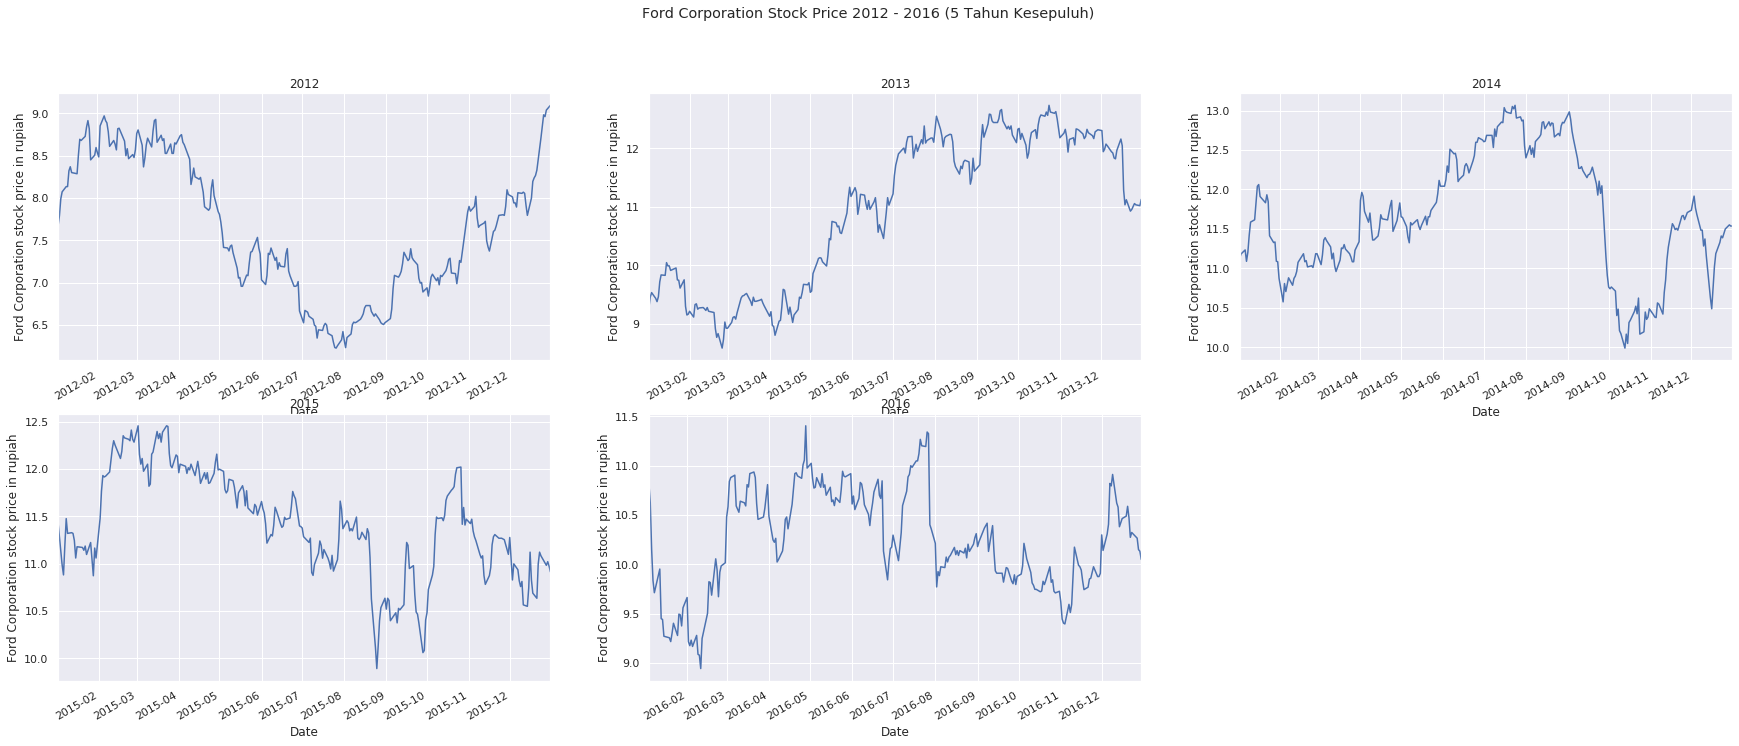

In [153]:
fig = plt.figure(figsize=(30,12))
fig.suptitle ('Ford Corporation Stock Price 2012 - 2016 (5 Tahun Kesepuluh)')

ax1 = fig.add_subplot(231)
ax1.set_title('2012')
ax1 = data1.loc['2012', 'Adj Close'].plot()
ax1.set_ylabel('Ford Corporation stock price in rupiah');

ax2 = fig.add_subplot(232)
ax2.set_title('2013')
ax2 = data1.loc['2013', 'Adj Close'].plot()
ax2.set_ylabel('Ford Corporation stock price in rupiah');

ax3 = fig.add_subplot(233)
ax3.set_title('2014')
ax3 = data1.loc['2014', 'Adj Close'].plot()
ax3.set_ylabel('Ford Corporation stock price in rupiah');

ax4 = fig.add_subplot(234)
ax4.set_title('2015')
ax4 = data1.loc['2015', 'Adj Close'].plot()
ax4.set_ylabel('Ford Corporation stock price in rupiah');

ax5 = fig.add_subplot(235)
ax5.set_title('2016')
ax5 = data1.loc['2016', 'Adj Close'].plot()
ax5.set_ylabel('Ford Corporation stock price in rupiah');

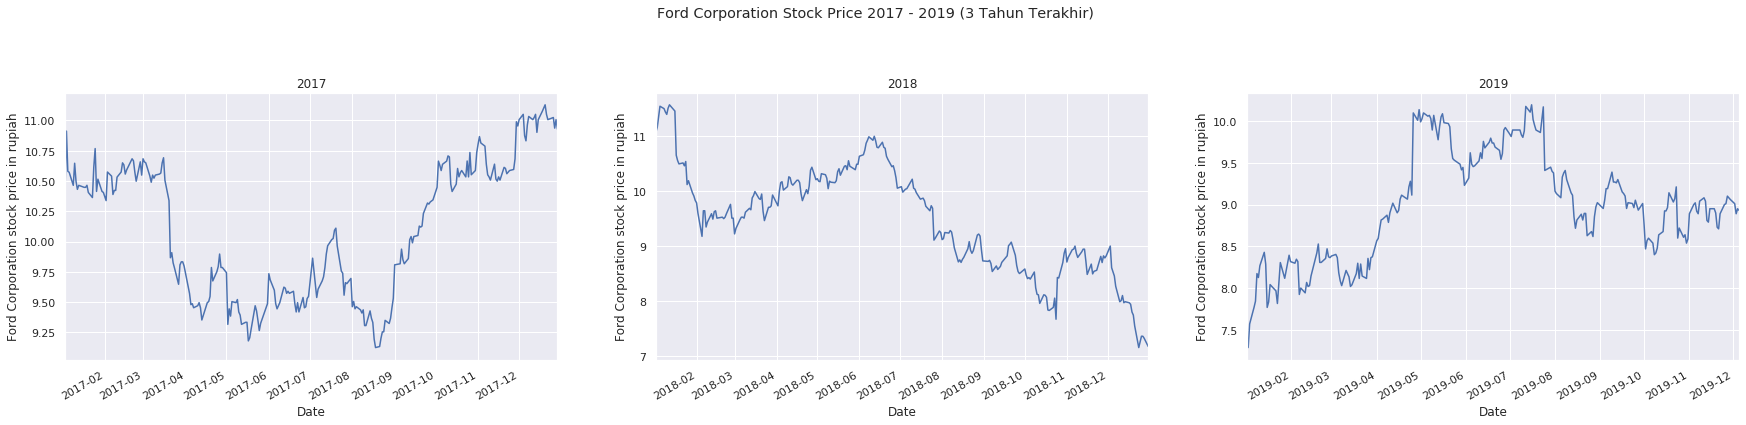

In [154]:
fig = plt.figure(figsize=(30,12))
fig.suptitle ('Ford Corporation Stock Price 2017 - 2019 (3 Tahun Terakhir)')

ax1 = fig.add_subplot(231)
ax1.set_title('2017')
ax1 = data1.loc['2017', 'Adj Close'].plot()
ax1.set_ylabel('Ford Corporation stock price in rupiah');

ax2 = fig.add_subplot(232)
ax2.set_title('2018')
ax2 = data1.loc['2018', 'Adj Close'].plot()
ax2.set_ylabel('Ford Corporation stock price in rupiah');

ax3 = fig.add_subplot(233)
ax3.set_title('2019')
ax3 = data1.loc['2019', 'Adj Close'].plot()
ax3.set_ylabel('Ford Corporation stock price in rupiah');

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """Entry point for launching an IPython kernel.


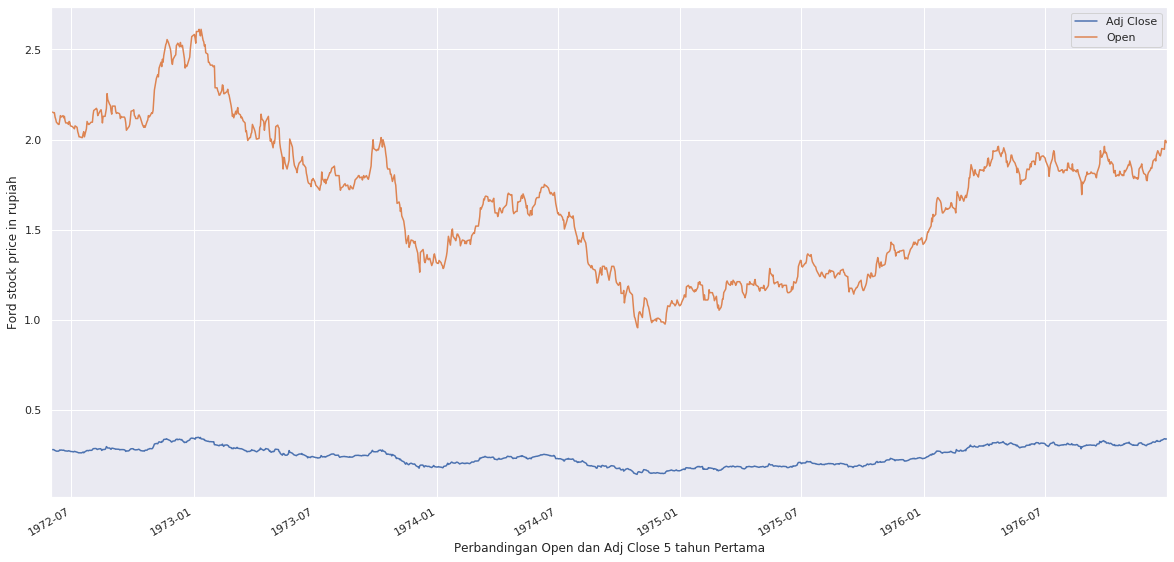

In [155]:
ax1 = fig.add_subplot(231)
ax1.set_title('1972')
ax1 = data1.loc['1972':'1976',['Adj Close', 'Open'] ].plot(figsize = (20,10))
ax1.set_ylabel('Ford stock price in rupiah');
ax1.set_xlabel('Perbandingan Open dan Adj Close 5 tahun Pertama');

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """Entry point for launching an IPython kernel.


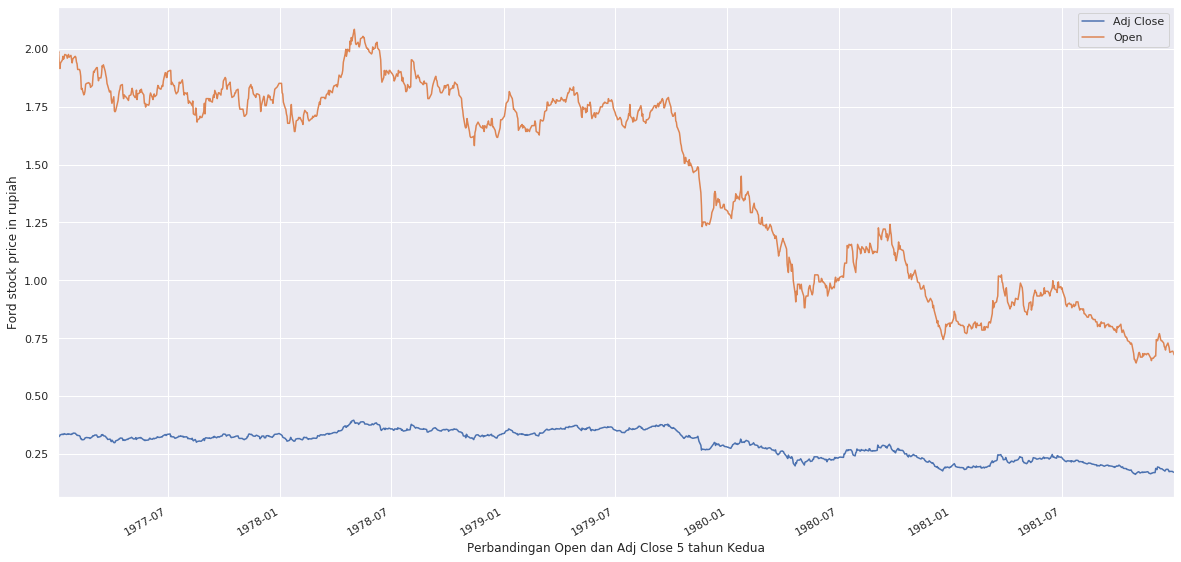

In [156]:
ax1 = fig.add_subplot(231)
ax1.set_title('1977')
ax1 = data1.loc['1977':'1981',['Adj Close', 'Open'] ].plot(figsize = (20,10))
ax1.set_ylabel('Ford stock price in rupiah');
ax1.set_xlabel('Perbandingan Open dan Adj Close 5 tahun Kedua');

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """Entry point for launching an IPython kernel.


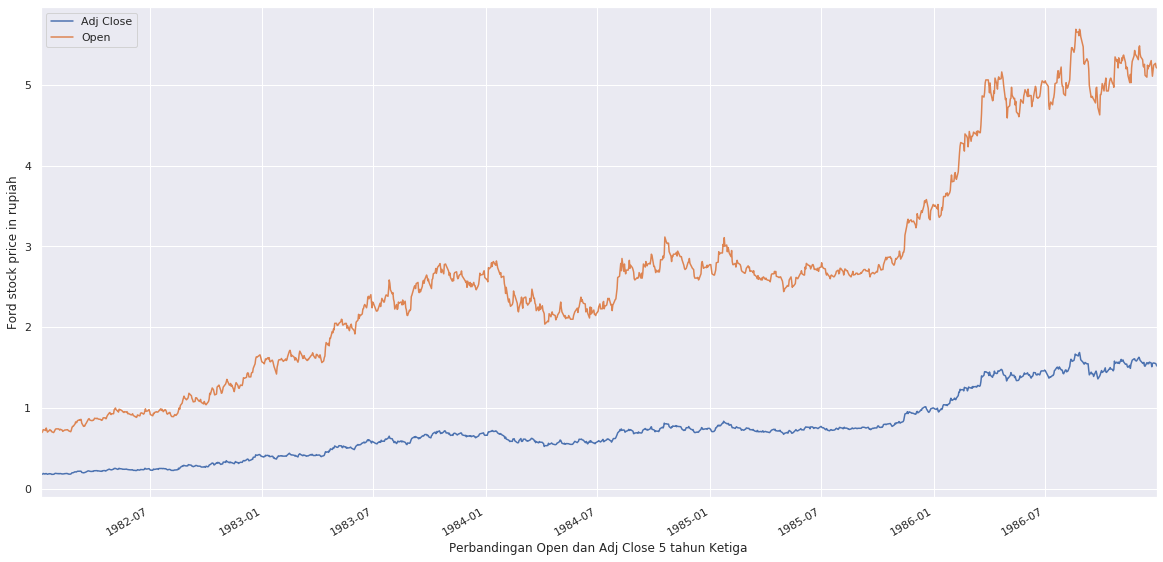

In [157]:
ax1 = fig.add_subplot(231)
ax1.set_title('1982')
ax1 = data1.loc['1982':'1986',['Adj Close', 'Open'] ].plot(figsize = (20,10))
ax1.set_ylabel('Ford stock price in rupiah');
ax1.set_xlabel('Perbandingan Open dan Adj Close 5 tahun Ketiga');

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """Entry point for launching an IPython kernel.


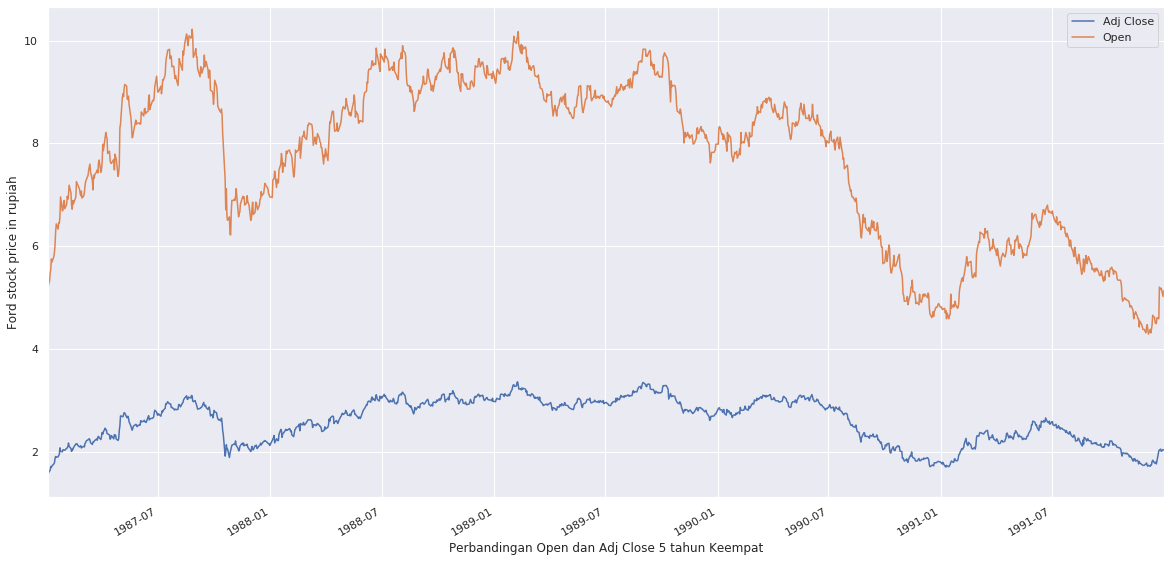

In [158]:
ax1 = fig.add_subplot(231)
ax1.set_title('1987')
ax1 = data1.loc['1987':'1991',['Adj Close', 'Open'] ].plot(figsize = (20,10))
ax1.set_ylabel('Ford stock price in rupiah');
ax1.set_xlabel('Perbandingan Open dan Adj Close 5 tahun Keempat');

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """Entry point for launching an IPython kernel.


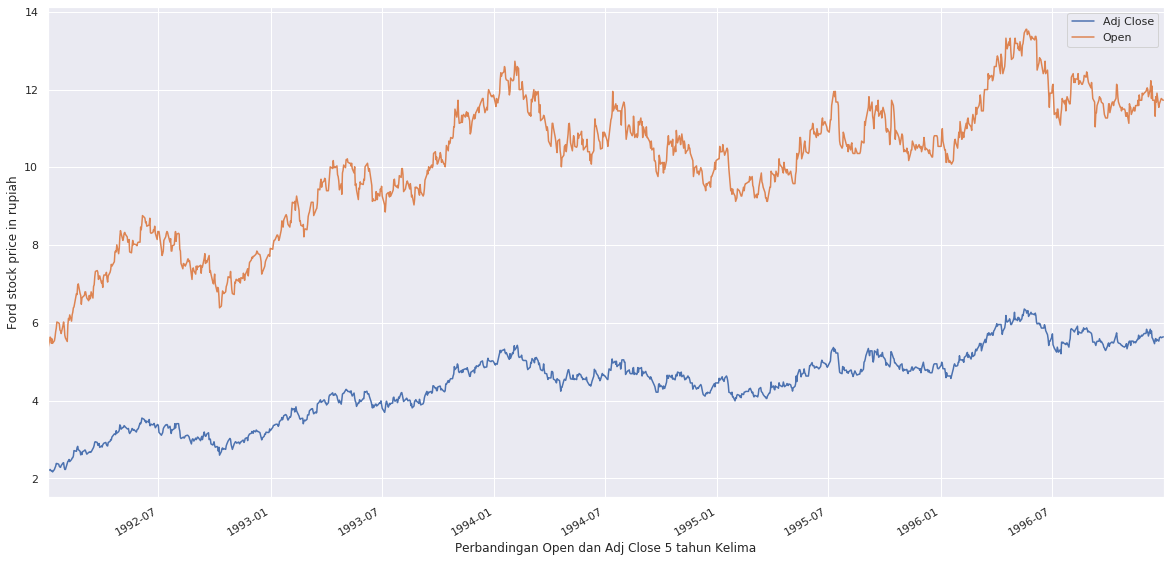

In [159]:
ax1 = fig.add_subplot(231)
ax1.set_title('1992')
ax1 = data1.loc['1992':'1996',['Adj Close', 'Open'] ].plot(figsize = (20,10))
ax1.set_ylabel('Ford stock price in rupiah');
ax1.set_xlabel('Perbandingan Open dan Adj Close 5 tahun Kelima');

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """Entry point for launching an IPython kernel.


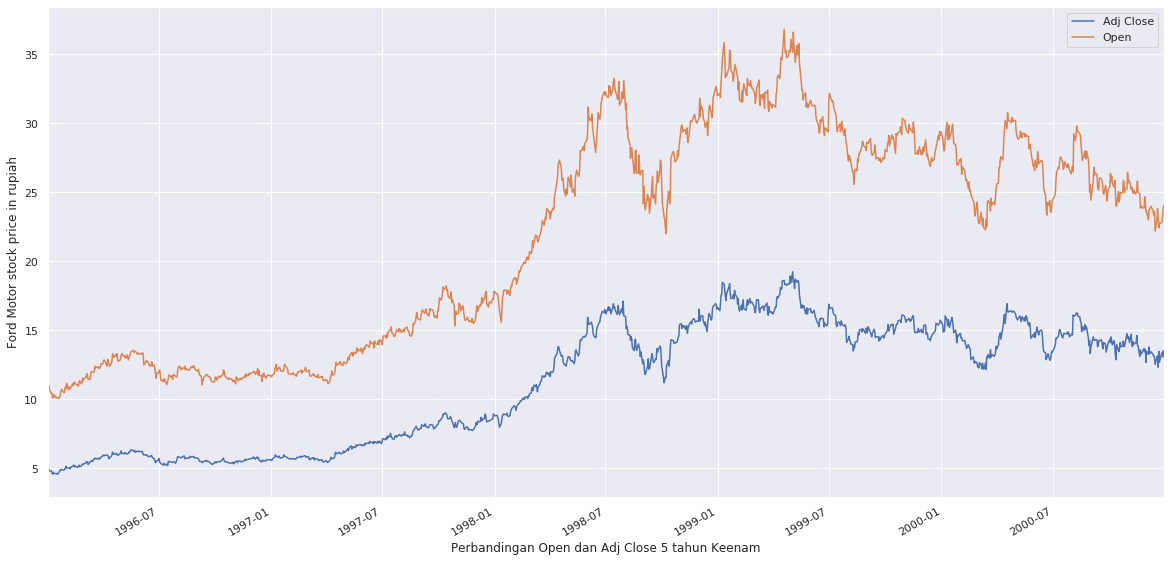

In [160]:
ax1 = fig.add_subplot(231)
ax1.set_title('1996')
ax1 = data1.loc['1996':'2000',['Adj Close', 'Open'] ].plot(figsize = (20,10))
ax1.set_ylabel('Ford Motor stock price in rupiah');
ax1.set_xlabel('Perbandingan Open dan Adj Close 5 tahun Keenam');

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """Entry point for launching an IPython kernel.


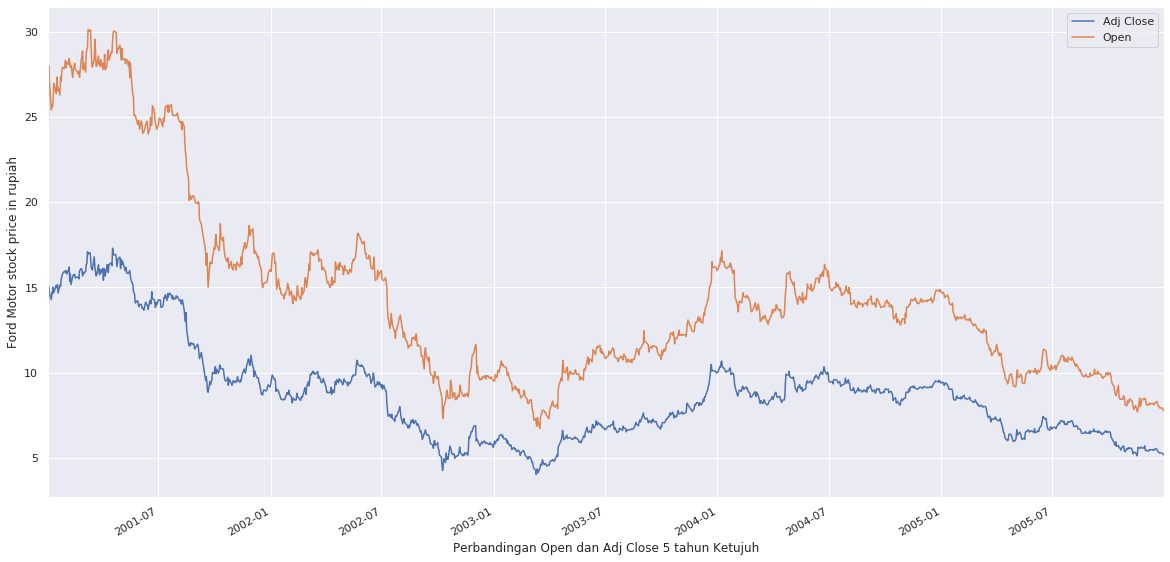

In [161]:
ax1 = fig.add_subplot(231)
ax1.set_title('2001')
ax1 = data1.loc['2001':'2005',['Adj Close', 'Open'] ].plot(figsize = (20,10))
ax1.set_ylabel('Ford Motor stock price in rupiah');
ax1.set_xlabel('Perbandingan Open dan Adj Close 5 tahun Ketujuh');

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """Entry point for launching an IPython kernel.


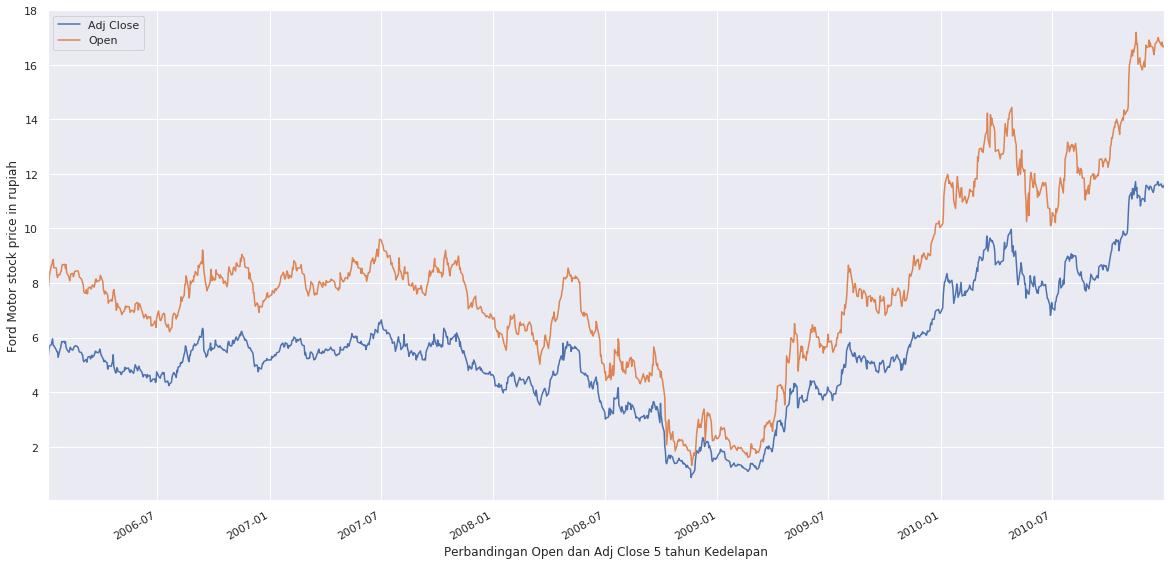

In [162]:
ax1 = fig.add_subplot(231)
ax1.set_title('2006')
ax1 = data1.loc['2006':'2010',['Adj Close', 'Open'] ].plot(figsize = (20,10))
ax1.set_ylabel('Ford Motor stock price in rupiah');
ax1.set_xlabel('Perbandingan Open dan Adj Close 5 tahun Kedelapan');

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """Entry point for launching an IPython kernel.


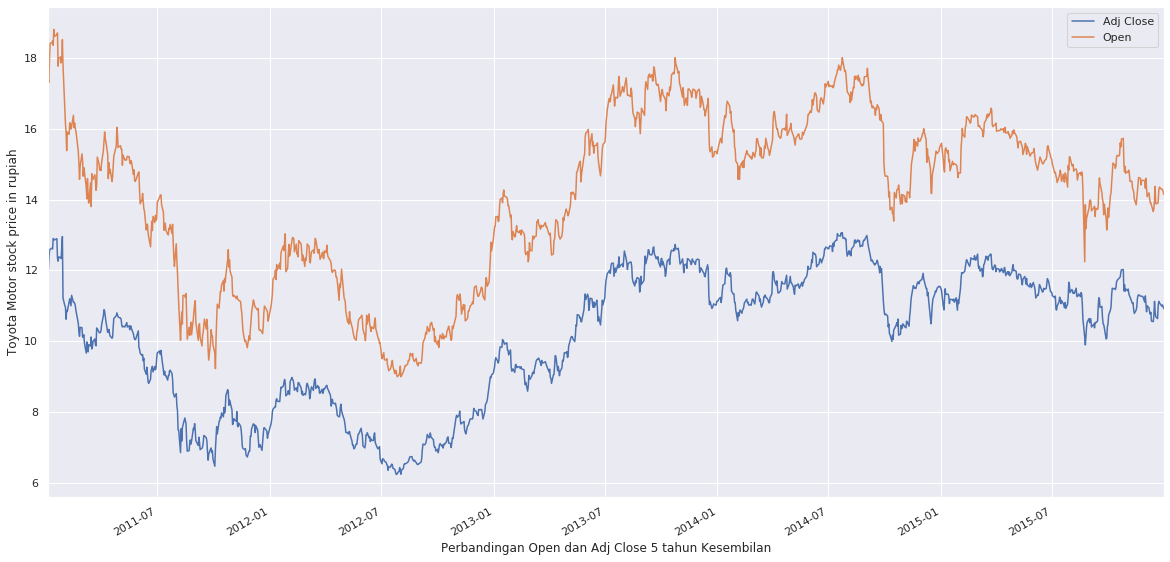

In [163]:
ax1 = fig.add_subplot(231)
ax1.set_title('2011')
ax1 = data1.loc['2011':'2015',['Adj Close', 'Open'] ].plot(figsize = (20,10))
ax1.set_ylabel('Toyota Motor stock price in rupiah');
ax1.set_xlabel('Perbandingan Open dan Adj Close 5 tahun Kesembilan');

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """Entry point for launching an IPython kernel.


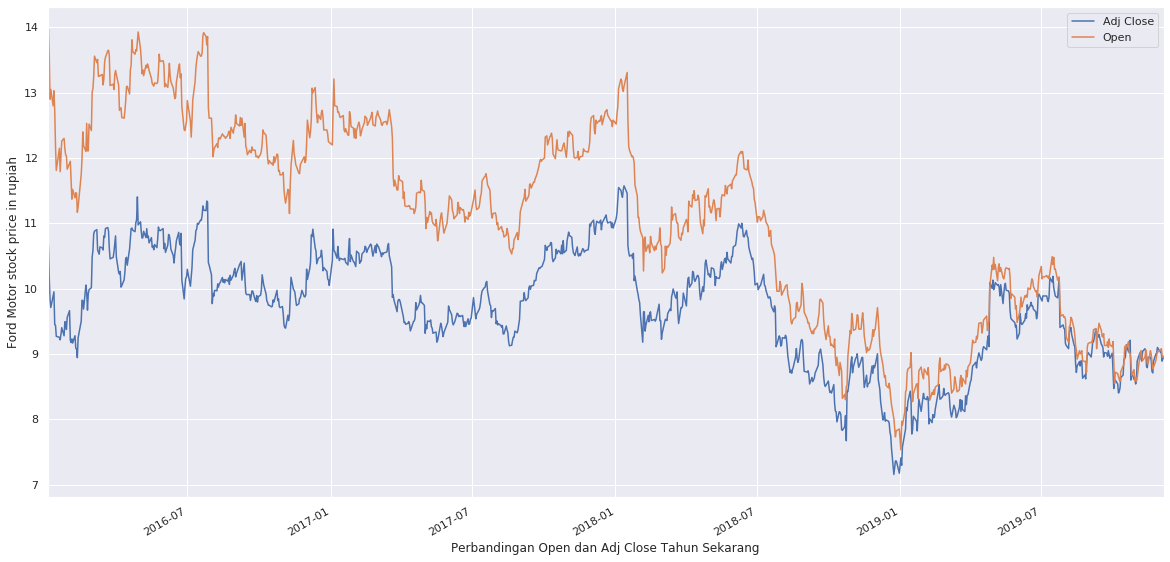

In [164]:
ax1 = fig.add_subplot(231)
ax1.set_title('2016')
ax1 = data1.loc['2016':'2019',['Adj Close', 'Open'] ].plot(figsize = (20,10))
ax1.set_ylabel('Ford Motor stock price in rupiah');
ax1.set_xlabel('Perbandingan Open dan Adj Close Tahun Sekarang');

In [0]:
des = data1.describe()

In [166]:
des

Open          High  ...     Adj Close        Volume
count  11984.000000  11984.000000  ...  11984.000000  1.198400e+04
mean       9.258472      9.374054  ...      5.293559  1.928192e+07
std        7.167610      7.268458  ...      4.609854  2.787850e+07
min        0.643736      0.648804  ...      0.144275  2.968000e+05
25%        2.412742      2.449237  ...      0.653217  4.183175e+06
50%        8.820000      8.918528  ...      4.599897  8.330900e+06
75%       12.454004     12.580000  ...      8.982816  2.584288e+07
max       36.819485     37.300335  ...     19.250069  5.411756e+08

[8 rows x 6 columns]

In [0]:
adj_close = data1['Adj Close']

In [0]:
time = np.linspace(1, len(adj_close), len(adj_close))

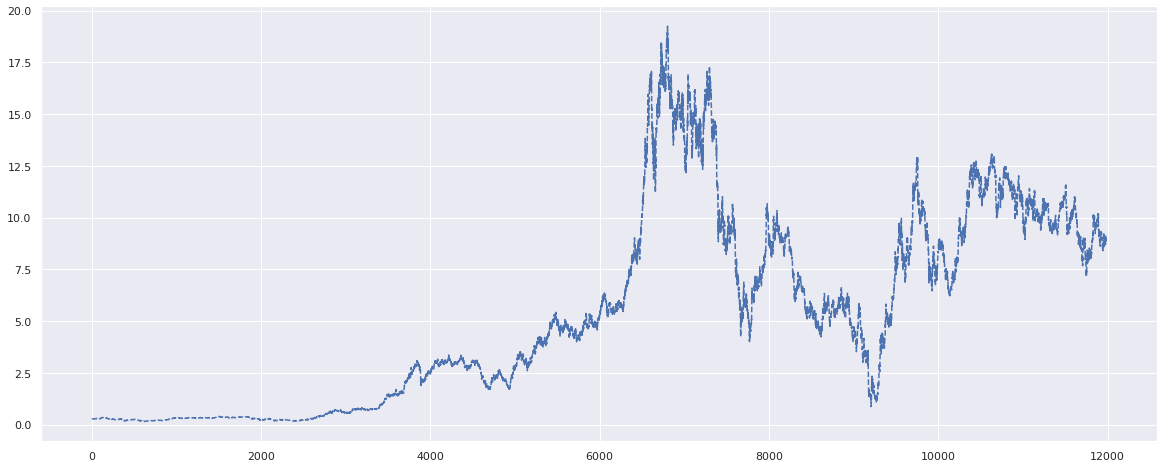

In [169]:
plt.plot(time, adj_close, label = '1972-2019', ls = '--')

In [170]:
print(data1)

                Open      High       Low     Close  Adj Close    Volume
Date                                                                   
1972-06-01  2.149165  2.173495  2.149165  2.153220   0.282115   1089200
1972-06-02  2.153220  2.173495  2.141055  2.149165   0.281584   1173500
1972-06-05  2.149165  2.169440  2.141055  2.149165   0.281584   5208100
1972-06-06  2.149165  2.157275  2.116725  2.124835   0.278396   1421400
1972-06-07  2.124835  2.137000  2.112669  2.112669   0.276802    671800
...              ...       ...       ...       ...        ...       ...
2019-11-29  9.040000  9.100000  9.030000  9.060000   9.060000  13096200
2019-12-02  9.080000  9.140000  9.000000  9.010000   9.010000  37232700
2019-12-03  8.950000  8.950000  8.800000  8.890000   8.890000  40653100
2019-12-04  8.950000  9.030000  8.940000  8.950000   8.950000  29982900
2019-12-05  8.970000  9.000000  8.880000  8.930000   8.930000  23822910

[11984 rows x 6 columns]


In [171]:
dataset = data1
print(dataset)

                Open      High       Low     Close  Adj Close    Volume
Date                                                                   
1972-06-01  2.149165  2.173495  2.149165  2.153220   0.282115   1089200
1972-06-02  2.153220  2.173495  2.141055  2.149165   0.281584   1173500
1972-06-05  2.149165  2.169440  2.141055  2.149165   0.281584   5208100
1972-06-06  2.149165  2.157275  2.116725  2.124835   0.278396   1421400
1972-06-07  2.124835  2.137000  2.112669  2.112669   0.276802    671800
...              ...       ...       ...       ...        ...       ...
2019-11-29  9.040000  9.100000  9.030000  9.060000   9.060000  13096200
2019-12-02  9.080000  9.140000  9.000000  9.010000   9.010000  37232700
2019-12-03  8.950000  8.950000  8.800000  8.890000   8.890000  40653100
2019-12-04  8.950000  9.030000  8.940000  8.950000   8.950000  29982900
2019-12-05  8.970000  9.000000  8.880000  8.930000   8.930000  23822910

[11984 rows x 6 columns]


In [0]:
def separate_by_class(dataset):
	separated = dict()
	for i in range(len(dataset)):
		vector = dataset[i]
		class_value = vector[-1]
		if (class_value not in separated):
			separated[class_value] = list()
		separated[class_value].append(vector)
	return separated

In [173]:
#Test Separating Data By Class
dataset =  [[2.149165,2.173495,0],
 [2.153220,2.173495,0],
 [2.149165,2.169440,0],
 [2.149165,2.157275,0],
 [2.124835,2.137000,0],
 [9.040000,9.100000,1],
 [9.080000,9.140000,1],
 [8.950000,8.950000,1],
 [8.950000,9.030000,1],
 [8.970000,9.000000,1]]
separated = separate_by_class(dataset)
for label in separated:
	print(label)
	for row in separated[label]:
		print(row)

0
[2.149165, 2.173495, 0]
[2.15322, 2.173495, 0]
[2.149165, 2.16944, 0]
[2.149165, 2.157275, 0]
[2.124835, 2.137, 0]
1
[9.04, 9.1, 1]
[9.08, 9.14, 1]
[8.95, 8.95, 1]
[8.95, 9.03, 1]
[8.97, 9.0, 1]


In [0]:
def mean(numbers):
	return sum(numbers)/float(len(numbers))
 # Calculate the standard deviation of a list of numbers
def stdev(numbers):
	avg = mean(numbers)
	variance = sum([(x-avg)**2 for x in numbers]) / float(len(numbers)-1)
	return sqrt(variance)

In [175]:
def summarize_dataset(dataset):
	summaries = [(mean(column), stdev(column), len(column)) for column in zip(*dataset)]
	del(summaries[-1])
	return summaries
summary = summarize_dataset(dataset)
print(summary)

[(5.571555000000001, 3.6120117441215807, 10), (5.603070499999999, 3.6274301446612234, 10)]


In [176]:
for label in summary:
	print(label)
	for row in summary:
		print(row)

(5.571555000000001, 3.6120117441215807, 10)
(5.571555000000001, 3.6120117441215807, 10)
(5.603070499999999, 3.6274301446612234, 10)
(5.603070499999999, 3.6274301446612234, 10)
(5.571555000000001, 3.6120117441215807, 10)
(5.603070499999999, 3.6274301446612234, 10)


In [0]:
def calculate_probability(x, mean, stdev):
	exponent = exp(-((x-mean)**2 / (2 * stdev**2 )))
	return (1 / (sqrt(2 * pi) * stdev)) * exponent

In [178]:
print(calculate_probability(1.0, 9.25, 7.16))
print(calculate_probability(2.0, 9.25, 7.16))
print(calculate_probability(0.0, 9.25, 7.16))

0.02868815832201914
0.033370021333317096
0.024186743203023185


1D Array filled with random values as per gaussian distribution : 
 [-0.04351536  0.18492637  0.06722948 ...  0.07946544 -0.04160199
  0.07112744]


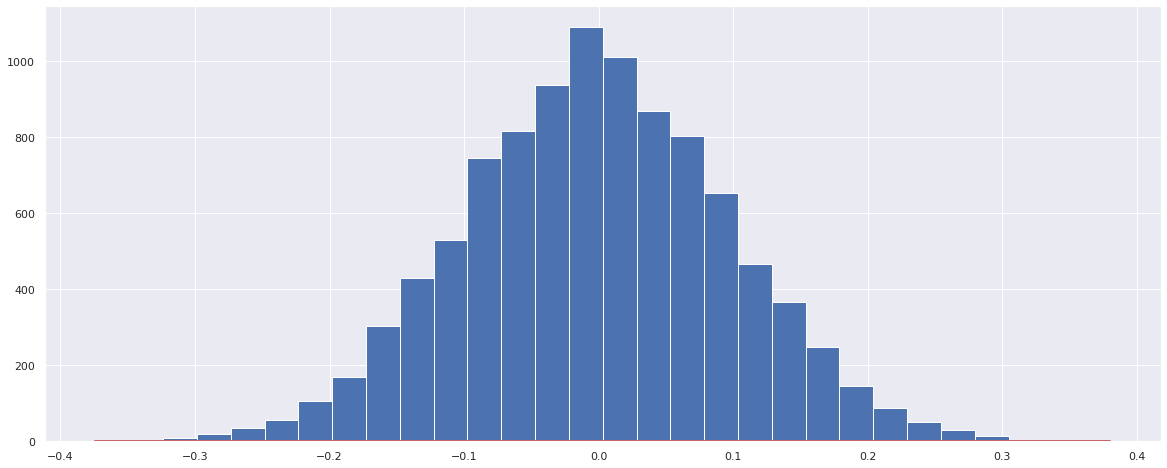

In [179]:
mean = 9.25
std = 7.16
array = geek.random.normal(0, 0.1, 10000) 
print("1D Array filled with random values "
      "as per gaussian distribution : \n", array); 
  
count, bins, ignored = plt.hist(array, 30, normed = None) 
plt.plot(bins, 1/(std * geek.sqrt(2 * geek.pi)) *
          geek.exp( - (bins - mean)**2 / (1 * std**2) ), 
          linewidth=2, color='r') 
plt.show() 
  

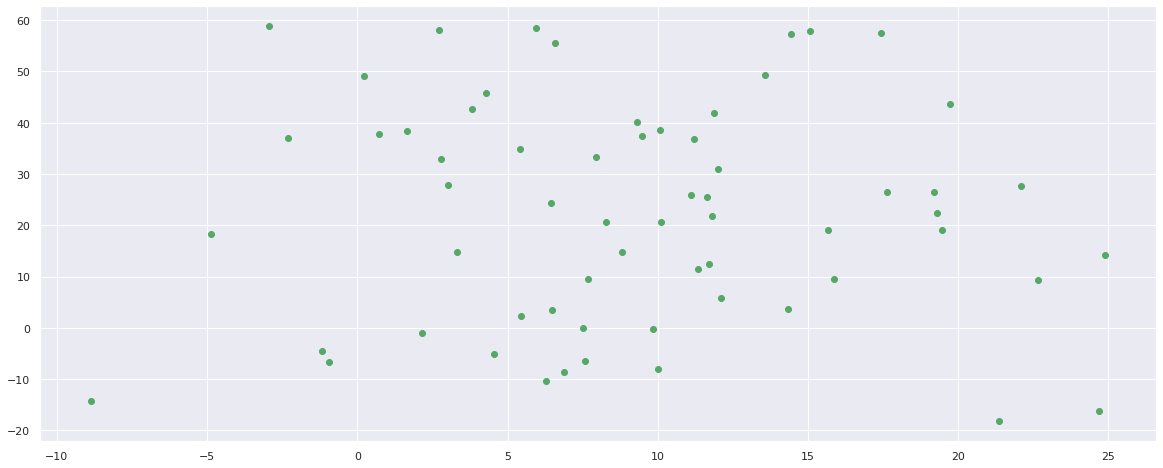

In [180]:
mu = 9
sigma = 7
np.random.seed(0)
x = np.random.normal(mu,sigma, (9,7))
y = np.random.normal(mu * 2, sigma * 3, (9,7))
plt.scatter(x, y, color ='g')
plt.show()

In [0]:
base_data = "Close" 
data_p= 9.25
data1["Prediksi"] = np.where(
      data1[base_data] >= data_p,"Positive","Negative")

In [182]:
print(data1["Prediksi"])

Date
1972-06-01    Negative
1972-06-02    Negative
1972-06-05    Negative
1972-06-06    Negative
1972-06-07    Negative
                ...   
2019-11-29    Negative
2019-12-02    Negative
2019-12-03    Negative
2019-12-04    Negative
2019-12-05    Negative
Name: Prediksi, Length: 11984, dtype: object


In [0]:
base_data1 = "Adj Close" 
data_po= 5.29
data1["Prediksi Harga Penutupan"] = np.where(
      data1[base_data1] >= data_po,"Positive","Negative")

In [184]:
print(data1["Prediksi Harga Penutupan"])

Date
1972-06-01    Negative
1972-06-02    Negative
1972-06-05    Negative
1972-06-06    Negative
1972-06-07    Negative
                ...   
2019-11-29    Positive
2019-12-02    Positive
2019-12-03    Positive
2019-12-04    Positive
2019-12-05    Positive
Name: Prediksi Harga Penutupan, Length: 11984, dtype: object


In [0]:
n_o_d = 3
variable_array= ["Open","High","Low"]
variable_array.append("Prediksi")
data1 = data1[variable_array].dropna(axis=0,how='any')

In [186]:
print(data1)

                Open      High       Low  Prediksi
Date                                              
1972-06-01  2.149165  2.173495  2.149165  Negative
1972-06-02  2.153220  2.173495  2.141055  Negative
1972-06-05  2.149165  2.169440  2.141055  Negative
1972-06-06  2.149165  2.157275  2.116725  Negative
1972-06-07  2.124835  2.137000  2.112669  Negative
...              ...       ...       ...       ...
2019-11-29  9.040000  9.100000  9.030000  Negative
2019-12-02  9.080000  9.140000  9.000000  Negative
2019-12-03  8.950000  8.950000  8.800000  Negative
2019-12-04  8.950000  9.030000  8.940000  Negative
2019-12-05  8.970000  9.000000  8.880000  Negative

[11984 rows x 4 columns]


In [0]:
train, test = train_test_split(data1, test_size=0.6, random_state=int(4))
gnb = GaussianNB()
newarr = []
newarr.extend(variable_array)
newarr.remove("Prediksi")

gnb.fit(train[newarr].values, train["Prediksi"])
result = gnb.predict(test[newarr])

In [188]:
print(result)

['Negative' 'Negative' 'Positive' ... 'Positive' 'Positive' 'Positive']


In [189]:
print("Number of mislabeled points out of a total {} points : {}, performance {:05.2f}%"
      .format(
          test.shape[0],
          (test["Prediksi"] != result).sum(),
          100*(1-(test["Prediksi"] != result).sum()/test.shape[0])
          ))

test_data = pd.concat([test[newarr], test["Prediksi"]], axis=1)
test_data["Prediksi"] = result
print (test_data)

Number of mislabeled points out of a total 7191 points : 185, performance 97.43%
                 Open       High        Low  Prediksi
Date                                                 
1974-07-05   1.585516   1.597681   1.585516  Negative
1978-06-19   1.875450   1.905863   1.875450  Negative
1997-05-12  13.389195  13.640100  13.389195  Positive
1982-02-12   0.724836   0.729905   0.719767  Negative
1985-05-08   2.509048   2.524255   2.493842  Negative
...               ...        ...        ...       ...
2010-04-26  14.390000  14.570000  14.280000  Positive
1973-08-20   1.747717   1.747717   1.731497  Negative
2002-09-19  10.000000  10.130000   9.710000  Positive
1993-08-05   9.808099   9.830909   9.511575  Positive
1996-05-09  13.001433  13.092671  12.955814  Positive

[7191 rows x 4 columns]


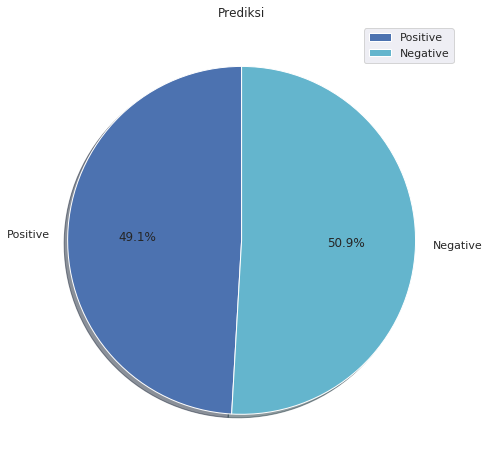

In [190]:
counts = ct(result)
count_p = counts['Positive']
count_n = counts['Negative']

slices = [count_p,count_n]
cols = ['b','c']
plt.pie(slices, labels=['Positive','Negative'],colors = cols,shadow=True,startangle=90,autopct='%1.1f%%')
plt.title("Prediksi")
plt.legend()
plt.show()